In [2]:
from itertools import combinations, product

unet_types = ['Unet', 'ResnetUnet', 'ConvUNeXt']
type_rec = ['L2', 'L1', 'TV']
type_recs = []
for r in range(1, len(type_rec) + 1):
    for combination in combinations(type_rec, r):
        type_recs.append('_'.join(combination))
print(type_recs)
print(unet_types)
radial_lines_num = [20]#,40,60,80,100]
print(radial_lines_num)


['L2', 'L1', 'TV', 'L2_L1', 'L2_TV', 'L1_TV', 'L2_L1_TV']
['Unet', 'ResnetUnet', 'ConvUNeXt']
[20]


In [3]:
file_path = 'subset_path.txt'
with open(file_path, 'r') as file:
    lines = file.readlines()
lines

['result_images/Unet_20lines_L2_L1_90epochs/000308339072_slice8.png\n',
 'result_images/ConvUNeXt_20lines_L2_L1_98epochs/000308339072_slice8.png\n',
 'result_images/ResnetUnet_20lines_L2_TV_97epochs/000308339072_slice8.png\n',
 'result_images/ResnetUnet_20lines_L1_TV_100epochs/000308339072_slice8.png\n',
 'result_images/ResnetUnet_20lines_L1_99epochs/000308339072_slice8.png\n',
 'result_images/ConvUNeXt_20lines_L1_TV_97epochs/000308339072_slice8.png\n',
 'result_images/ConvUNeXt_20lines_L1_95epochs/000308339072_slice8.png\n',
 'result_images/ResnetUnet_20lines_TV_100epochs/000308339072_slice8.png\n',
 'result_images/ConvUNeXt_20lines_TV_100epochs/000308339072_slice8.png\n',
 'result_images/ConvUNeXt_20lines_L2_L1_TV_76epochs/000308339072_slice8.png\n',
 'result_images/Unet_20lines_L1_86epochs/000308339072_slice8.png\n',
 'result_images/Unet_20lines_TV_96epochs/000308339072_slice8.png\n',
 'result_images/ConvUNeXt_20lines_L2_TV_91epochs/000308339072_slice8.png\n',
 'result_images/Resnet

In [4]:
lines = [line.strip() for line in open(file_path)]
lines

originals = [l for l in lines if l.startswith('BIRN_dataset/birn_png/')]
print(originals)
ids = [o.split('/')[-1][:-15] for o in originals ]
print(ids)

l2s = [l for l in lines if l.startswith('BIRN_dataset/birn_pngs_20lines_L2')]
l1s = [l for l in lines if l.startswith('BIRN_dataset/birn_pngs_20lines_L1')]
TVs = [l for l in lines if l.startswith('BIRN_dataset/birn_pngs_20lines_TV')]



['BIRN_dataset/birn_png/000308339072_slice8_normalized.png', 'BIRN_dataset/birn_png/000314025202_slice15_normalized.png', 'BIRN_dataset/birn_png/000311228084_slice11_normalized.png', 'BIRN_dataset/birn_png/001083789439_slice24_normalized.png', 'BIRN_dataset/birn_png/000500882566_slice23_normalized.png', 'BIRN_dataset/birn_png/000961719234_slice15_normalized.png', 'BIRN_dataset/birn_png/000337412566_slice14_normalized.png', 'BIRN_dataset/birn_png/000696960682_slice9_normalized.png', 'BIRN_dataset/birn_png/001025550152_slice16_normalized.png', 'BIRN_dataset/birn_png/001012126889_slice17_normalized.png']
['000308339072_slice8', '000314025202_slice15', '000311228084_slice11', '001083789439_slice24', '000500882566_slice23', '000961719234_slice15', '000337412566_slice14', '000696960682_slice9', '001025550152_slice16', '001012126889_slice17']


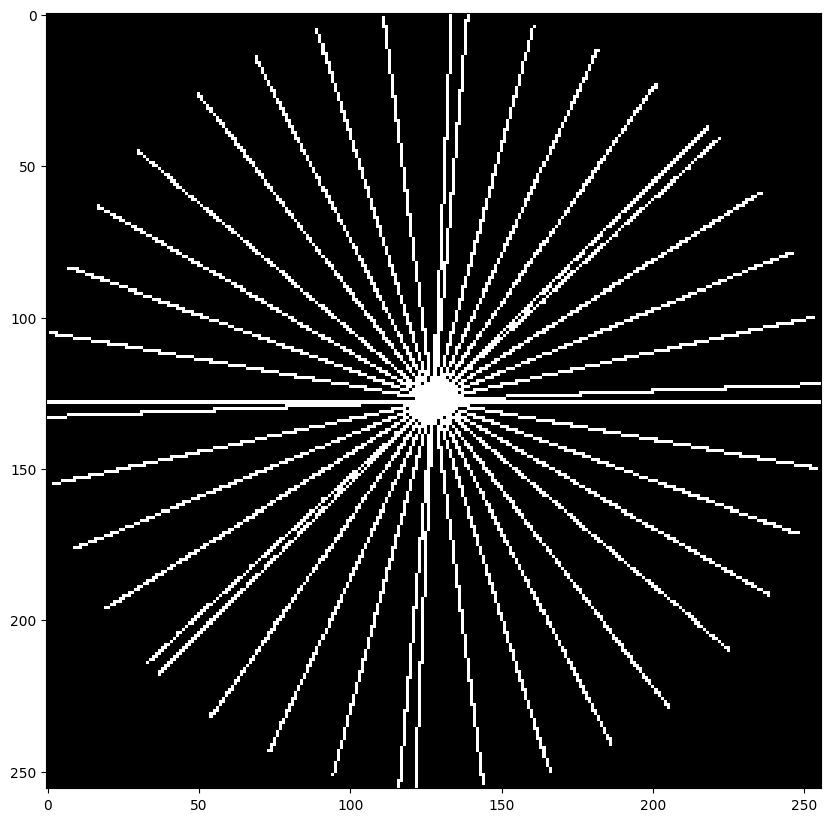

In [5]:
import IAFNNESTA.k_space as k_space
import IAFNNESTA.radial as radial
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10,20))

shape = (256,256)
idx = radial.radial2D(20,shape)
pos = radial.view_positions(idx, shape)
plt.imshow(pos, cmap='gray')

In [6]:
def view_measures(img, radial_lines):
    shape = img.shape
    idx = radial.radial2D(radial_lines,shape)
    measures = k_space.k_space_sampling(img,shape,idx)
    return radial.view_positions(idx, shape, measures)




In [7]:
from PIL import Image
from skimage.transform import resize
import numpy as np

measurements = [] 
for file in originals:
    image=np.array(Image.open(file).convert('L'))
    image=image.astype(float)/np.max(image[...])
    measurements.append(view_measures(image, 20))

    
    

/home/jonathanalis/MRI_unet_reconstruction/IAFNNESTA/radial.py:33: ComplexWarning: Casting complex values to real discards the imaginary part
  y[idx] = measurements


In [8]:

radial_lines_num  = 20
#reconstructed = [[[line for i, tr in enumerate(type_rec) ] for j, unet in enumerate(unet_types)] for k, line in enumerate(lines) if line.startswith(f'result_images/{unet}_20lines_{tr}_')]
#reconstructed = [[['' for i, tr in enumerate(type_rec) ] for j, unet in enumerate(unet_types)] for k, line in enumerate(lines)]
reconstructed = np.empty(shape=(len(type_recs), len(unet_types), len(originals)), dtype=object)

if 1:
    for i, tr in enumerate(type_recs):
        print(i, tr)
        for j, unet in enumerate(unet_types):
            print(j,unet)
            counter = 0
            for k, id in enumerate(ids):
                for l in lines:
                    if l.startswith(f'result_images/{unet}_20lines_{tr}_') and l.endswith(f'{id}.png'):
                        print(k,l, counter)
                        reconstructed[i][j][k] = l
                        counter+=1
print(reconstructed)

0 L2
0 Unet
0 result_images/Unet_20lines_L2_L1_90epochs/000308339072_slice8.png 0
0 result_images/Unet_20lines_L2_TV_90epochs/000308339072_slice8.png 1
0 result_images/Unet_20lines_L2_L1_TV_95epochs/000308339072_slice8.png 2
0 result_images/Unet_20lines_L2_83epochs/000308339072_slice8.png 3
1 result_images/Unet_20lines_L2_L1_90epochs/000314025202_slice15.png 4
1 result_images/Unet_20lines_L2_TV_90epochs/000314025202_slice15.png 5
1 result_images/Unet_20lines_L2_L1_TV_95epochs/000314025202_slice15.png 6
1 result_images/Unet_20lines_L2_83epochs/000314025202_slice15.png 7
2 result_images/Unet_20lines_L2_L1_90epochs/000311228084_slice11.png 8
2 result_images/Unet_20lines_L2_TV_90epochs/000311228084_slice11.png 9
2 result_images/Unet_20lines_L2_L1_TV_95epochs/000311228084_slice11.png 10
2 result_images/Unet_20lines_L2_83epochs/000311228084_slice11.png 11
3 result_images/Unet_20lines_L2_L1_90epochs/001083789439_slice24.png 12
3 result_images/Unet_20lines_L2_TV_90epochs/001083789439_slice24.p

In [9]:
reconstructed[0][0][1]
#primeiro indice: typo de recosntrucao
#segundo indice: typo de unet
#terceiro indice: imagem



'result_images/Unet_20lines_L2_83epochs/000314025202_slice15.png'

In [10]:
from matplotlib.pyplot import figure
import matplotlib.gridspec as gridspec
from skimage.metrics import peak_signal_noise_ratio
import cv2

def read_img(file, scale = None):
    print(file)
    image = np.array(Image.open(file).convert('L'))
    if scale == None:
        return image.astype(float)
    return image.astype(float)*scale

def draw_text_on_image(image, text, position=(10, 230), font=cv2.FONT_HERSHEY_SIMPLEX, 
                       font_scale=0.7, color=(1.0, 1.0, 1.0), thickness=2):
    cv2.putText(image, text, position, font, font_scale, color, thickness, cv2.LINE_AA)

def draw_text_on_white(text, font=cv2.FONT_HERSHEY_SIMPLEX, font_scale=2, color=(0, 0, 0), thickness=2):
    (text_width, text_height), baseline = cv2.getTextSize(text, font, font_scale, thickness)
    image_size = (text_width + 10, text_height + 30)
    image = np.ones((image_size[1], image_size[0], 3), dtype=np.uint8) * 255
    position = ((image_size[0] - text_width) // 2, (image_size[1] + text_height) // 2)
    cv2.putText(image, text, position, font, font_scale, color, thickness, cv2.LINE_AA)

    return image


def plot_imagem(img_indx):
    #reconstructed
    #pos
    #originals
    #l2s
    #l1s
    #tvs
    #type_recs
    #unet_types
    #radial_lines_num  = 20
    original = read_img(originals[img_indx])
    max = np.max(original[...])
    scale = 1/max
    original = original*scale

    fig, axs = plt.subplots(7, 5, figsize=(15, 21))
    fig.tight_layout()
    gs = gridspec.GridSpec(7, 5, height_ratios=[1, 0.1, 1, 1, 1, 1, 1], width_ratios=[1,1, 1, 1, 1])

    #ax = plt.subplot(gs[0, 0])
    axs[0, 0].imshow(original, cmap = 'gray')
    axs[0, 0].text(-0.05, 0.5, f'Original', rotation=90,
                       transform=axs[0, 0].transAxes, va='center', ha='right',
                       fontsize=15)
    axs[0,0].axis('off')
    
 
    axs[1, 0].imshow(pos, cmap = 'gray')
    axs[1, 0].text(-0.05, 0.5, f'Measurements', rotation=90,
                       transform=axs[1, 0].transAxes, va='center', ha='right',
                       fontsize=15)
    #axs[1, 0].imshow(measurements[img_indx], cmap = 'gray')
    
    img = read_img(l2s[img_indx], scale)
    print(np.max(original[...]))
    print(np.max(img[...]))
    psnr = peak_signal_noise_ratio(original, img)
    psnr_text = f"PSNR: {psnr:.2f} dB"
    draw_text_on_image(img,psnr_text)
    axs[3, 0].imshow(img, cmap = 'gray')
    axs[3, 0].text(-0.05, 0.5, f'L2 reconstruction', rotation=90,
                       transform=axs[3, 0].transAxes, va='center', ha='right',
                       fontsize=15)
    img = read_img(l1s[img_indx], scale)
    print(np.max(img[...]))
    psnr = peak_signal_noise_ratio(original, img)
    psnr_text = f"PSNR: {psnr:.2f} dB"
    draw_text_on_image(img,psnr_text)
    axs[4, 0].imshow(img, cmap = 'gray')
    axs[4, 0].text(-0.05, 0.5, f'L1 reconstruction', rotation=90,
                       transform=axs[4, 0].transAxes, va='center', ha='right',
                       fontsize=15)
    img = read_img(TVs[img_indx], scale)
    print(np.max(img[...]))
    psnr = peak_signal_noise_ratio(original, img)
    psnr_text = f"PSNR: {psnr:.2f} dB"
    draw_text_on_image(img,psnr_text)
    axs[5, 0].imshow(img, cmap = 'gray')
    axs[5, 0].text(-0.05, 0.5, f'TV reconstruction', rotation=90,
                       transform=axs[5, 0].transAxes, va='center', ha='right',
                       fontsize=15)
    
    for i, tr in enumerate(type_recs):
        for j, unet in enumerate(unet_types):
            img_file = reconstructed[i][j][img_indx]
            print(img_file)
            img = read_img(img_file, scale)
            psnr = peak_signal_noise_ratio(original, img)
            psnr_text = f"PSNR: {psnr:.2f} dB"
            draw_text_on_image(img,psnr_text)
            
            axs[i, 2+j].imshow(img, cmap = 'gray')
            axs[i, 2+j].text(-0.05, 0.5, f'{type_recs[i]}', rotation=90,
                       transform=axs[i, 1+j].transAxes, va='center', ha='right',
                       fontsize=15)
            
    img = draw_text_on_white('linha')
    img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
    #axs[0, 1].imshow(img, cmap = 'gray')
    img = draw_text_on_white('linha')
    #img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
    #axs[1, 1].imshow(img, cmap = 'gray')
            
    for ax in axs.flat:
        ax.axis('off')
        #ax.set_xticks([])
        #ax.set_yticks([])
    fig.subplots_adjust(hspace=0.01, wspace=0.01)

    plt.show()


def plot_imagem_2(img_indx):
    #reconstructed
    #pos
    #originals
    #l2s
    #l1s
    #tvs
    #type_recs
    #unet_types
    #radial_lines_num  = 20
    original = read_img(originals[img_indx])
    max = np.max(original[...])
    scale = 1/max
    original = original*scale

    fig, axs = plt.subplots(7, 5, figsize=(15, 21))
    fig.tight_layout()
    gs = gridspec.GridSpec(7, 5, height_ratios=[1, 0.1, 1, 1, 1, 1, 1], width_ratios=[1,1, 1, 1, 1])

    ax = plt.subplot(gs[0, 0])
    ax.imshow(original, cmap = 'gray')
    ax.text(-0.05, 0.5, f'Original', rotation=90,
                       transform=ax.transAxes, va='center', ha='right',
                       fontsize=15)
    ax.axis('off')
    
    ax = plt.subplot(gs[1, 0])
    ax.imshow(pos, cmap = 'gray')
    ax.text(-0.05, 0.5, f'Measurements', rotation=90,
                       transform=ax.transAxes, va='center', ha='right',
                       fontsize=15)
    ax.axis('off')
    #axs[1, 0].imshow(measurements[img_indx], cmap = 'gray')
    
    #l2
    img = read_img(l2s[img_indx], scale)
    print(np.max(original[...]))
    print(np.max(img[...]))
    psnr = peak_signal_noise_ratio(original, img)
    psnr_text = f"PSNR: {psnr:.2f} dB"
    draw_text_on_image(img,psnr_text)
    ax = plt.subplot(gs[3, 0])
    ax.imshow(img, cmap = 'gray')
    ax.text(-0.05, 0.5, f'L2 reconstruction', rotation=90,
                       transform=ax.transAxes, va='center', ha='right',
                       fontsize=15)
    ax.axis('off')
    
    #l1
    img = read_img(l1s[img_indx], scale)
    print(np.max(img[...]))
    psnr = peak_signal_noise_ratio(original, img)
    psnr_text = f"PSNR: {psnr:.2f} dB"
    draw_text_on_image(img,psnr_text)
    ax = plt.subplot(gs[4, 0])
    
    ax.imshow(img, cmap = 'gray')
    ax.text(-0.05, 0.5, f'L1 reconstruction', rotation=90,
                       transform=ax.transAxes, va='center', ha='right',
                       fontsize=15)
    img = read_img(TVs[img_indx], scale)
    print(np.max(img[...]))
    psnr = peak_signal_noise_ratio(original, img)
    psnr_text = f"PSNR: {psnr:.2f} dB"
    draw_text_on_image(img,psnr_text)

    ax = plt.subplot(gs[5, 0])
    ax.imshow(img, cmap = 'gray')
    ax.text(-0.05, 0.5, f'TV reconstruction', rotation=90,
                       transform=ax.transAxes, va='center', ha='right',
                       fontsize=15)
    
    for i, tr in enumerate(type_recs):
        for j, unet in enumerate(unet_types):
            img_file = reconstructed[i][j][img_indx]
            print(img_file)
            img = read_img(img_file, scale)
            psnr = peak_signal_noise_ratio(original, img)
            psnr_text = f"PSNR: {psnr:.2f} dB"
            draw_text_on_image(img,psnr_text)
            
            #axs[i, 2+j].imshow(img, cmap = 'gray')
            #axs[i, 2+j].text(-0.05, 0.5, f'{type_recs[i]}', rotation=90,
            #           transform=axs[i, 1+j].transAxes, va='center', ha='right',
            #           fontsize=15)
            
    img = draw_text_on_white('linha')
    img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
    #axs[0, 1].imshow(img, cmap = 'gray')
    img = draw_text_on_white('linha')
    #img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
    #axs[1, 1].imshow(img, cmap = 'gray')
            
    for ax in axs.flat:
        ax.axis('off')
        #ax.set_xticks([])
        #ax.set_yticks([])
    fig.subplots_adjust(hspace=0.01, wspace=0.01)

    plt.show()

BIRN_dataset/birn_png/000308339072_slice8_normalized.png
BIRN_dataset/birn_pngs_20lines_TV/000308339072_slice8_TV_20lines.png


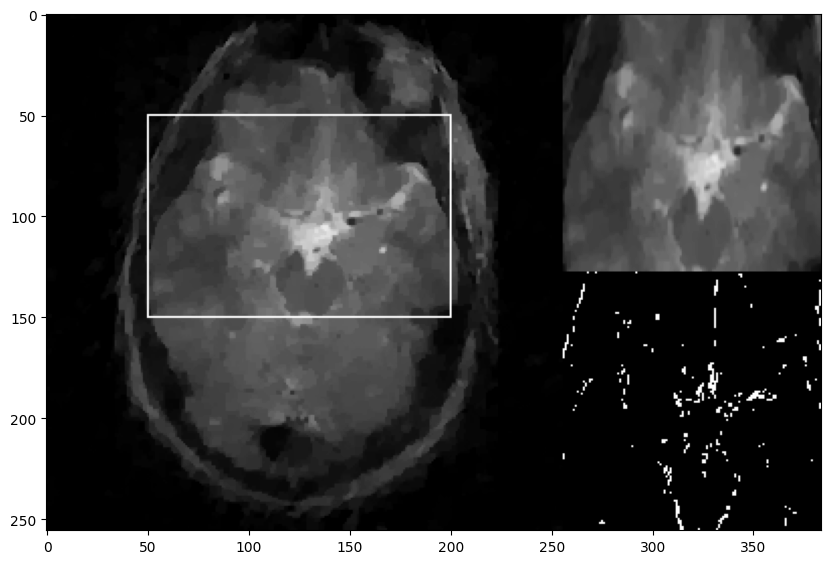

In [11]:
original = read_img(originals[0])
max = np.max(original[...])
scale = 1/max
original = original*scale


img_l2 = read_img(TVs[0], scale)

def zoom_crop(input_img, z = [150,100,200,150], original=None):
    img = input_img.copy()
    cv2.rectangle(img, (z[1],z[0]), (z[3],z[2]), color=(1,1,1), thickness=1)

    crop = input_img[z[0]:z[2],z[1]:z[3]]

    zoomed = cv2.resize(crop, (img.shape[0]//2, img.shape[1]//2))
    if original is None:
        blanc = np.ones_like(zoomed)
    else: 
        diff = np.abs(original - input_img)
        
        blanc = diff[z[0]:z[2],z[1]:z[3]]
        blanc=blanc/np.max(original[z[0]:z[2],z[1]:z[3]])
        blanc = (cv2.resize(blanc, (img.shape[0]//2, img.shape[1]//2))>0.1)*1.0

    im_right = cv2.vconcat((zoomed,blanc))


    im = cv2.hconcat((img, im_right))
        
    return im
    
plt.imshow(zoom_crop(img_l2, z = [50,50,150,200], original=original), cmap='gray')


BIRN_dataset/birn_png/000696960682_slice9_normalized.png
[50, 50, 100, 100]
BIRN_dataset/birn_pngs_20lines_L2/000696960682_slice9_L2_20lines.png
1.0
0.7211538461538461
BIRN_dataset/birn_pngs_20lines_L1/000696960682_slice9_L1_20lines.png
0.9038461538461539
BIRN_dataset/birn_pngs_20lines_TV/000696960682_slice9_TV_20lines.png
0.9326923076923077
result_images/Unet_20lines_L2_83epochs/000696960682_slice9.png
result_images/Unet_20lines_L2_83epochs/000696960682_slice9.png
result_images/ResnetUnet_20lines_L2_L1_TV_97epochs/000696960682_slice9.png
result_images/ResnetUnet_20lines_L2_L1_TV_97epochs/000696960682_slice9.png
result_images/ConvUNeXt_20lines_L2_95epochs/000696960682_slice9.png
result_images/ConvUNeXt_20lines_L2_95epochs/000696960682_slice9.png
result_images/Unet_20lines_L1_TV_98epochs/000696960682_slice9.png
result_images/Unet_20lines_L1_TV_98epochs/000696960682_slice9.png
result_images/ResnetUnet_20lines_L1_99epochs/000696960682_slice9.png
result_images/ResnetUnet_20lines_L1_99epoch

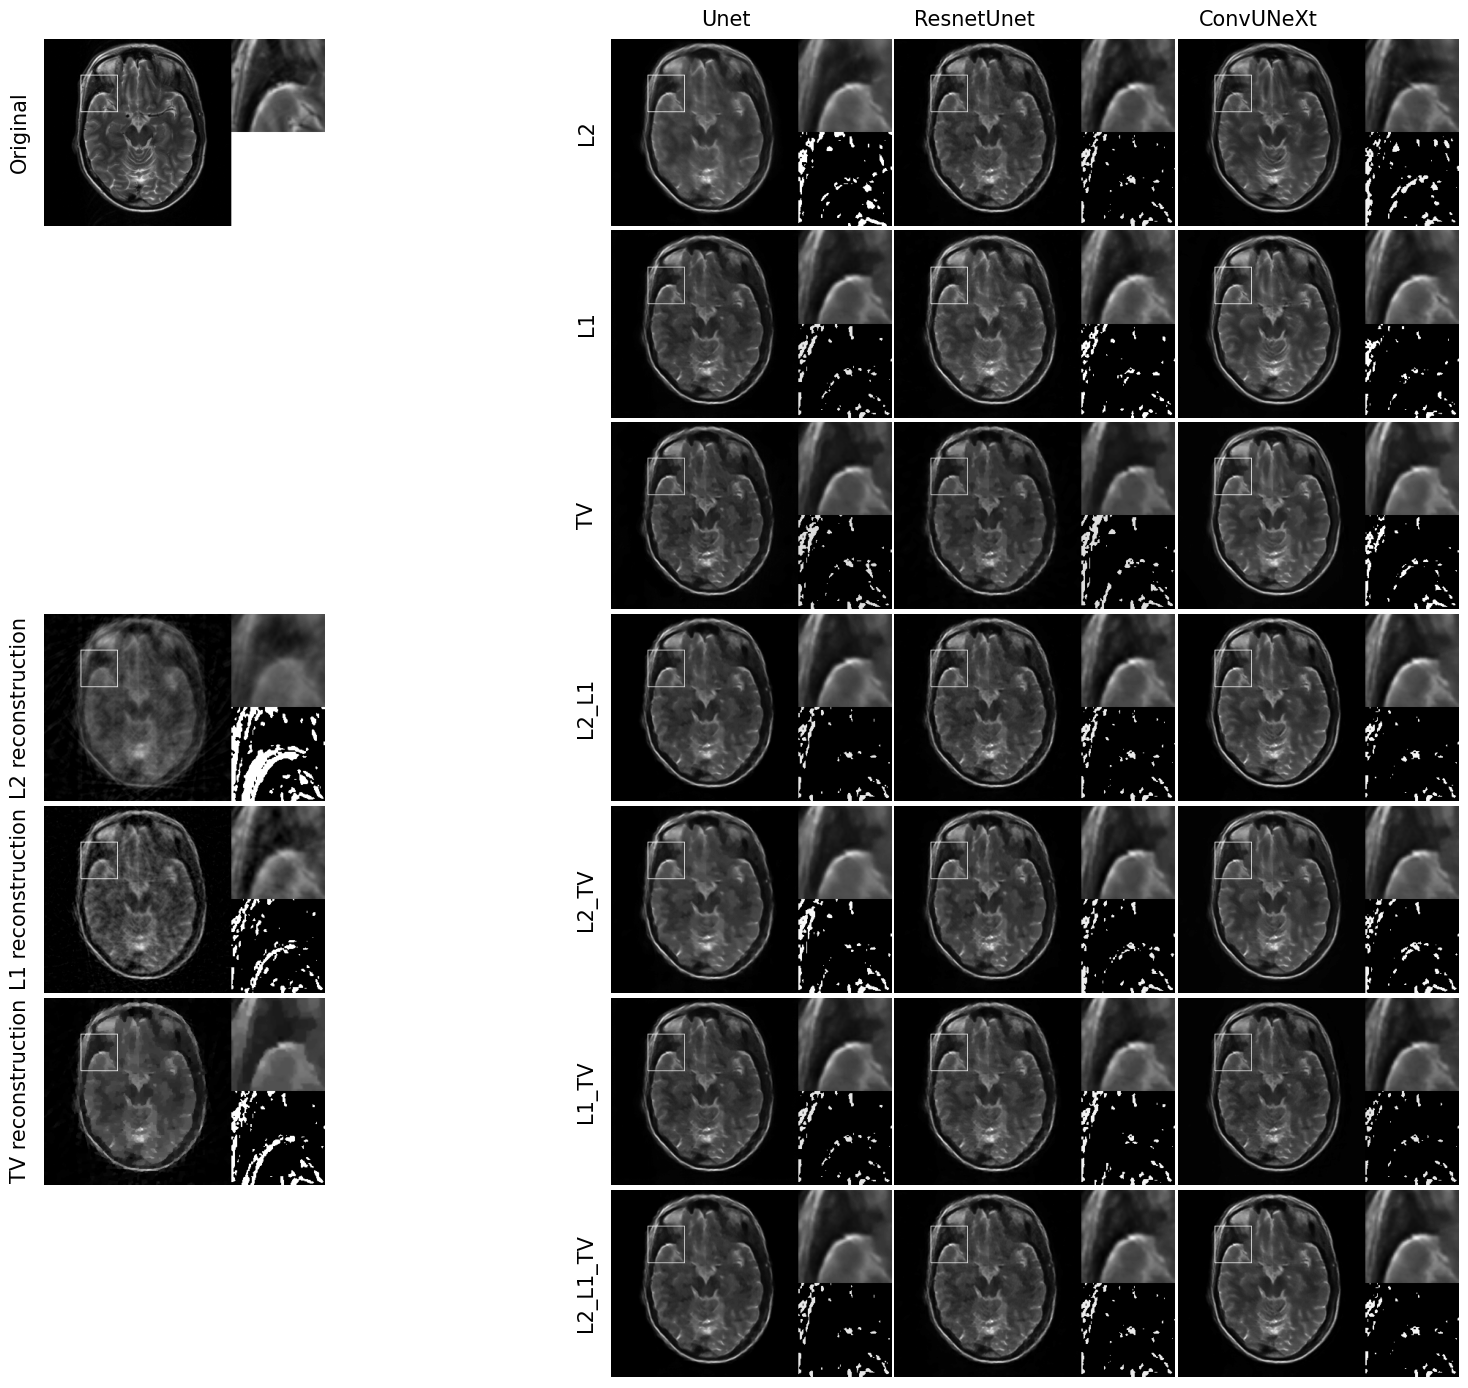

In [12]:



def plot_images_reference(img_indx, show_psnr = False, crop_rect = [50,50,100,100]):
    original = read_img(originals[img_indx])
    max = np.max(original[...])
    scale = 1/max
    original = original*scale

    

    fig, axs = plt.subplots(7, 5, figsize=(15, 14))
    fig.tight_layout()

    #ax = plt.subplot(gs[0, 0])
    print(crop_rect)
    axs[0, 0].imshow(zoom_crop(original, z=crop_rect), cmap = 'gray')
    axs[0, 0].text(-0.05, 0.5, f'Original', rotation=90,
                       transform=axs[0, 0].transAxes, va='center', ha='right',
                       fontsize=15)
    axs[0,0].axis('off')
    
 
    #axs[1, 0].imshow(pos, cmap = 'gray')
    #axs[1, 0].text(-0.05, 0.5, f'Measurements', rotation=90,
    #                   transform=axs[1, 0].transAxes, va='center', ha='right',
    #                   fontsize=15)
    
    img = read_img(l2s[img_indx], scale)
    print(np.max(original[...]))
    print(np.max(img[...]))
    if show_psnr:
        psnr = peak_signal_noise_ratio(original, img)
        psnr_text = f"PSNR: {psnr:.2f} dB"
        draw_text_on_image(img,psnr_text)
    axs[3, 0].imshow(zoom_crop(img, original=original, z=crop_rect), cmap = 'gray')
    axs[3, 0].text(-0.05, 0.5, f'L2 reconstruction', rotation=90,
                       transform=axs[3, 0].transAxes, va='center', ha='right',
                       fontsize=15)
    img = read_img(l1s[img_indx], scale)
    print(np.max(img[...]))
    if show_psnr:
        psnr = peak_signal_noise_ratio(original, img)
        psnr_text = f"PSNR: {psnr:.2f} dB"
        draw_text_on_image(img,psnr_text)
    axs[4, 0].imshow(zoom_crop(img, original=original, z=crop_rect), cmap = 'gray')
    axs[4, 0].text(-0.05, 0.5, f'L1 reconstruction', rotation=90,
                       transform=axs[4, 0].transAxes, va='center', ha='right',
                       fontsize=15)
    img = read_img(TVs[img_indx], scale)
    print(np.max(img[...]))
    if show_psnr:
        psnr = peak_signal_noise_ratio(original, img)
        psnr_text = f"PSNR: {psnr:.2f} dB"
        draw_text_on_image(img,psnr_text)
    axs[5, 0].imshow(zoom_crop(img, original=original, z=crop_rect), cmap = 'gray')
    axs[5, 0].text(-0.05, 0.5, f'TV reconstruction', rotation=90,
                       transform=axs[5, 0].transAxes, va='center', ha='right',
                       fontsize=15)
    
    for i, tr in enumerate(type_recs):
            
        for j, unet in enumerate(unet_types):
            img_file = reconstructed[i][j][img_indx]
            print(img_file)
            img = read_img(img_file, scale)
            if show_psnr:
                psnr = peak_signal_noise_ratio(original, img)
                psnr_text = f"PSNR: {psnr:.2f} dB"
                draw_text_on_image(img,psnr_text)
            
            axs[i, 2+j].imshow(zoom_crop(img, original=original, z=crop_rect), cmap = 'gray')
        
            if i == 0:
                axs[i, 2+j].text(0.5, +1.1, f'{unet_types[j]}',
                        transform=axs[i, 2+j].transAxes, va='center', ha='right',
                        fontsize=15)

            if j == 0:
                axs[i, 2+j].text(-0.05, 0.5, f'{type_recs[i]}', rotation=90,
                        transform=axs[i, 2+j].transAxes, va='center', ha='right',
                        fontsize=15)
            
    img = draw_text_on_white('linha')
    img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
    #axs[0, 1].imshow(img, cmap = 'gray')
    img = draw_text_on_white('linha')
    #img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
    #axs[1, 1].imshow(img, cmap = 'gray')
            
    for ax in axs.flat:
        ax.axis('off')
        #ax.set_xticks([])
        #ax.set_yticks([])
    fig.subplots_adjust(hspace=0.01, wspace=0.01)

    plt.show()

plot_images_reference(7)
#8 7 9 2 0 6 1 5 3 4

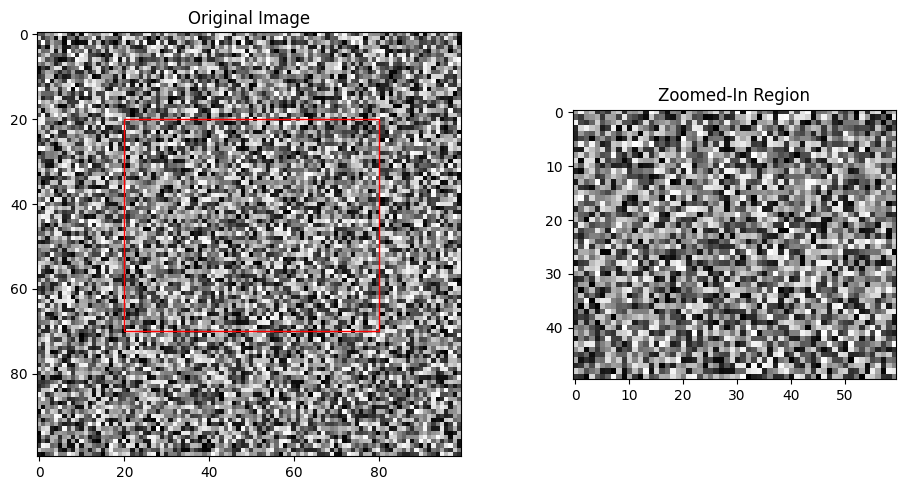

In [13]:

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

# Generate a sample image
original_image = np.random.rand(100, 100)

# Create a subplot grid
fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1])

# Plot the original image
ax_original = plt.subplot(gs[0])
ax_original.imshow(original_image, cmap='gray')
ax_original.set_title('Original Image')

# Define the coordinates for the zoomed-in region
zoom_region = [20, 70, 20, 80]  # [ymin, ymax, xmin, xmax]

# Extract the zoomed-in region from the original image
zoomed_image = original_image[zoom_region[0]:zoom_region[1], zoom_region[2]:zoom_region[3]]

# Plot the zoomed-in image
ax_zoomed = plt.subplot(gs[1])
ax_zoomed.imshow(zoomed_image, cmap='gray')
ax_zoomed.set_title('Zoomed-In Region')

# Highlight the zoomed-in region in the original image
rect = plt.Rectangle((zoom_region[2], zoom_region[0]), zoom_region[3] - zoom_region[2], zoom_region[1] - zoom_region[0],
                     linewidth=1, edgecolor='r', facecolor='none')
ax_original.add_patch(rect)

plt.tight_layout()
plt.show()


BIRN_dataset/birn_png/001025550152_slice16_normalized.png
[50, 50, 100, 100]
BIRN_dataset/birn_pngs_20lines_L2/001025550152_slice16_L2_20lines.png
1.0
0.5764705882352941
BIRN_dataset/birn_pngs_20lines_L1/001025550152_slice16_L1_20lines.png
0.6941176470588235
BIRN_dataset/birn_pngs_20lines_TV/001025550152_slice16_TV_20lines.png
0.7058823529411764


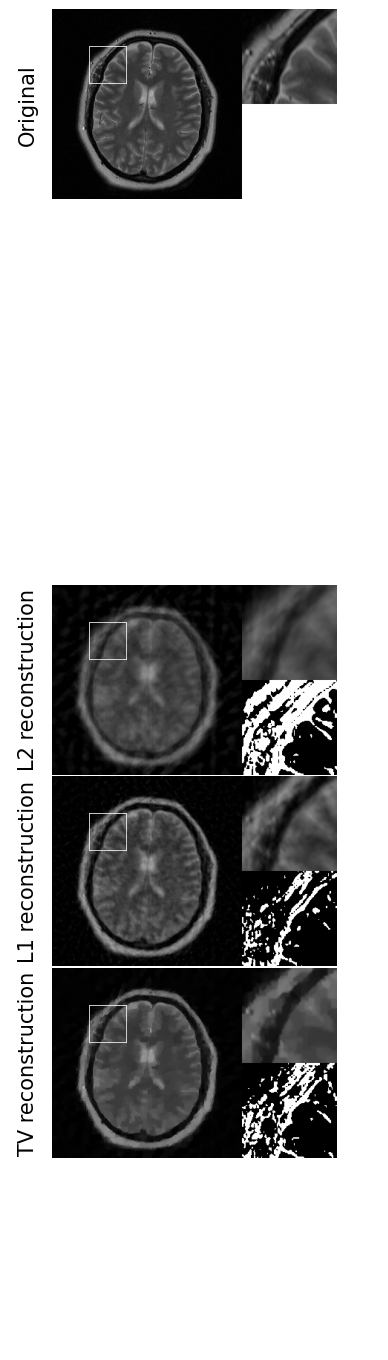

In [14]:



def plot_images_reference(img_indx, show_psnr = False, crop_rect = [50,50,100,100]):
    original = read_img(originals[img_indx])
    max = np.max(original[...])
    scale = 1/max
    original = original*scale

    

    fig, axs = plt.subplots(7, 1, figsize=(4.5, 14))
    fig.tight_layout()

    #ax = plt.subplot(gs[0, 0])
    print(crop_rect)
    axs[0].imshow(zoom_crop(original, z=crop_rect), cmap = 'gray')
    axs[0].text(-0.05, 0.5, f'Original', rotation=90,
                       transform=axs[0].transAxes, va='center', ha='right',
                       fontsize=15)
    axs[0].axis('off')
    axs[0].text(0.5, +1.1, f'',
                        transform=axs[0].transAxes, va='center', ha='right',
                        fontsize=15)
 
    #axs[1, 0].imshow(pos, cmap = 'gray')
    #axs[1, 0].text(-0.05, 0.5, f'Measurements', rotation=90,
    #                   transform=axs[1, 0].transAxes, va='center', ha='right',
    #                   fontsize=15)
    
    img = read_img(l2s[img_indx], scale)
    print(np.max(original[...]))
    print(np.max(img[...]))
    if show_psnr:
        psnr = peak_signal_noise_ratio(original, img)
        psnr_text = f"PSNR: {psnr:.2f} dB"
        draw_text_on_image(img,psnr_text)
    axs[3].imshow(zoom_crop(img, original=original, z=crop_rect), cmap = 'gray')
    axs[3].text(-0.05, 0.5, f'L2 reconstruction', rotation=90,
                       transform=axs[3].transAxes, va='center', ha='right',
                       fontsize=15)
    img = read_img(l1s[img_indx], scale)
    print(np.max(img[...]))
    if show_psnr:
        psnr = peak_signal_noise_ratio(original, img)
        psnr_text = f"PSNR: {psnr:.2f} dB"
        draw_text_on_image(img,psnr_text)
    axs[4].imshow(zoom_crop(img, original=original, z=crop_rect), cmap = 'gray')
    axs[4].text(-0.05, 0.5, f'L1 reconstruction', rotation=90,
                       transform=axs[4].transAxes, va='center', ha='right',
                       fontsize=15)
    img = read_img(TVs[img_indx], scale)
    print(np.max(img[...]))
    if show_psnr:
        psnr = peak_signal_noise_ratio(original, img)
        psnr_text = f"PSNR: {psnr:.2f} dB"
        draw_text_on_image(img,psnr_text)
    axs[5].imshow(zoom_crop(img, original=original, z=crop_rect), cmap = 'gray')
    axs[5].text(-0.05, 0.5, f'TV reconstruction', rotation=90,
                       transform=axs[5].transAxes, va='center', ha='right',
                       fontsize=15)
    

    img = draw_text_on_white('linha')
    img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
    #axs[0, 1].imshow(img, cmap = 'gray')
    img = draw_text_on_white('linha')
    #img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
    #axs[1, 1].imshow(img, cmap = 'gray')
            
    for ax in axs.flat:
        ax.axis('off')
        #ax.set_xticks([])
        #ax.set_yticks([])
    fig.subplots_adjust(hspace=0.01, wspace=0.01)
    plt.savefig("references.png",dpi=300, bbox_inches = "tight")

    plt.show()


plot_images_reference(8)
#8 7 9 2 0 6 1 5 3 4

BIRN_dataset/birn_png/000696960682_slice9_normalized.png
result_images/Unet_20lines_L2_83epochs/000696960682_slice9.png
result_images/Unet_20lines_L2_83epochs/000696960682_slice9.png
result_images/ResnetUnet_20lines_L2_L1_TV_97epochs/000696960682_slice9.png
result_images/ResnetUnet_20lines_L2_L1_TV_97epochs/000696960682_slice9.png
result_images/ConvUNeXt_20lines_L2_95epochs/000696960682_slice9.png
result_images/ConvUNeXt_20lines_L2_95epochs/000696960682_slice9.png
result_images/Unet_20lines_L1_TV_98epochs/000696960682_slice9.png
result_images/Unet_20lines_L1_TV_98epochs/000696960682_slice9.png
result_images/ResnetUnet_20lines_L1_99epochs/000696960682_slice9.png
result_images/ResnetUnet_20lines_L1_99epochs/000696960682_slice9.png
result_images/ConvUNeXt_20lines_L1_95epochs/000696960682_slice9.png
result_images/ConvUNeXt_20lines_L1_95epochs/000696960682_slice9.png
result_images/Unet_20lines_TV_96epochs/000696960682_slice9.png
result_images/Unet_20lines_TV_96epochs/000696960682_slice9.png

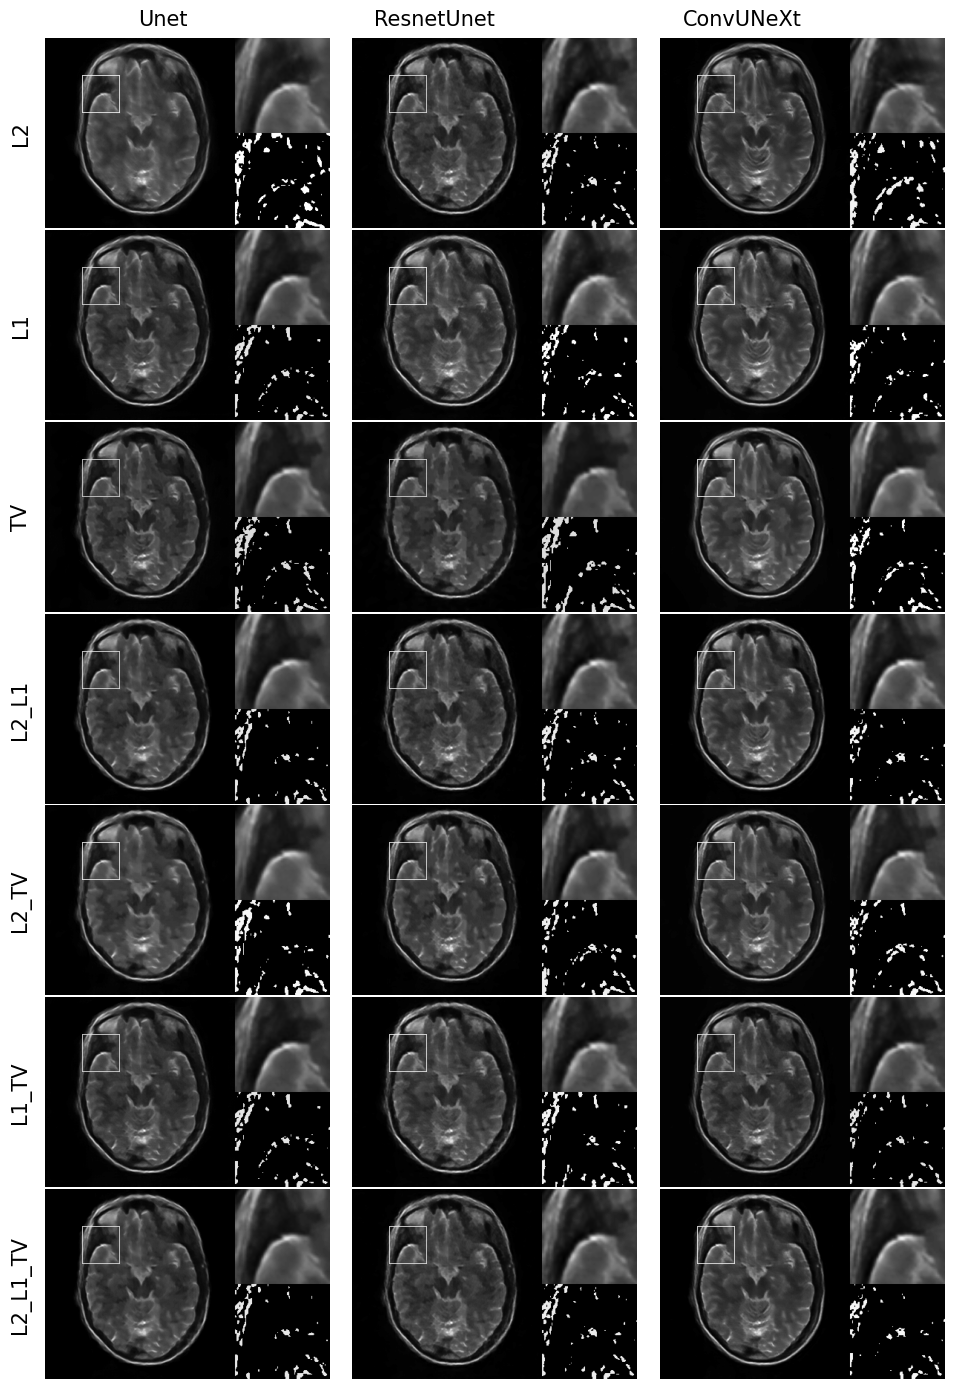

In [15]:



def plot_images_results(img_indx, show_psnr = False, crop_rect = [50,50,100,100]):
    original = read_img(originals[img_indx])
    max = np.max(original[...])
    scale = 1/max
    original = original*scale

    

    fig, axs = plt.subplots(7, 3, figsize=(10, 14))
    fig.tight_layout()

    for i, tr in enumerate(type_recs):
            
        for j, unet in enumerate(unet_types):
            img_file = reconstructed[i][j][img_indx]
            print(img_file)
            img = read_img(img_file, scale)
            if show_psnr:
                psnr = peak_signal_noise_ratio(original, img)
                psnr_text = f"PSNR: {psnr:.2f} dB"
                draw_text_on_image(img,psnr_text)
            
            axs[i, j].imshow(zoom_crop(img, original=original, z=crop_rect), cmap = 'gray')
        
            if i == 0:
                axs[i, j].text(0.5, +1.1, f'{unet_types[j]}',
                        transform=axs[i, j].transAxes, va='center', ha='right',
                        fontsize=15)

            if j == 0:
                axs[i, j].text(-0.05, 0.5, f'{type_recs[i]}', rotation=90,
                        transform=axs[i, j].transAxes, va='center', ha='right',
                        fontsize=15)
            
    img = draw_text_on_white('linha')
    img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
    #axs[0, 1].imshow(img, cmap = 'gray')
    img = draw_text_on_white('linha')
    #img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
    #axs[1, 1].imshow(img, cmap = 'gray')
            
    for ax in axs.flat:
        ax.axis('off')
        #ax.set_xticks([])
        #ax.set_yticks([])
    fig.subplots_adjust(hspace=0.01, wspace=0.01)
    plt.savefig("results.png",dpi=300, bbox_inches = "tight")

    plt.show()

plot_images_results(7)
#8 7 9 2 0 6 1 5 3 4

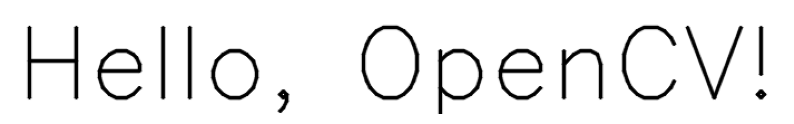

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def draw_text_on_white(text, font=cv2.FONT_HERSHEY_SIMPLEX, font_scale=3, color=(0, 0, 0), thickness=2):
    (text_width, text_height), baseline = cv2.getTextSize(text, font, font_scale, thickness)
    image_size = (text_width + 10, text_height + 30)
    image = np.ones((image_size[1], image_size[0], 3), dtype=np.uint8) * 255
    position = ((image_size[0] - text_width) // 2, (image_size[1] + text_height) // 2)
    cv2.putText(image, text, position, font, font_scale, color, thickness, cv2.LINE_AA)

    return image

text_image = draw_text_on_white("Hello, OpenCV!")

# Display the result using Matplotlib
plt.imshow(cv2.cvtColor(text_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


In [17]:
from itertools import combinations, product

unet_types = ['Unet', 'ResnetUnet', 'ConvUNeXt']
type_rec = ['L2', 'L1', 'TV']
type_recs = []
for r in range(1, len(type_rec) + 1):
    for combination in combinations(type_rec, r):
        type_recs.append('_'.join(combination))
print(type_recs)
print(unet_types)
radial_lines_num = [20]#,40,60,80,100]
print(radial_lines_num)


['L2', 'L1', 'TV', 'L2_L1', 'L2_TV', 'L1_TV', 'L2_L1_TV']
['Unet', 'ResnetUnet', 'ConvUNeXt']
[20]


In [18]:
import os
import re
import pandas as pd
from itertools import combinations, product
from scipy.stats import f_oneway
#from statsmodels.stats.multicomp import pairwise_tukeyhsd



unet_types = ['Unet', 'ResnetUnet', 'ConvUNeXt']
type_rec = ['L2', 'L1', 'TV']
type_recs = []
for r in range(1, len(type_rec) + 1):
    for combination in combinations(type_rec, r):
        type_recs.append('_'.join(combination))
print(type_recs)
print(unet_types)
radial_lines_num = [20,40,60,80,100]
print(radial_lines_num)


all_combinations = list(product(unet_types, radial_lines_num, type_recs))
df = pd.DataFrame(all_combinations, columns=['unet', 'radial_lines', 'reconstruction'])
print(df)


['L2', 'L1', 'TV', 'L2_L1', 'L2_TV', 'L1_TV', 'L2_L1_TV']
['Unet', 'ResnetUnet', 'ConvUNeXt']
[20, 40, 60, 80, 100]
          unet  radial_lines reconstruction
0         Unet            20             L2
1         Unet            20             L1
2         Unet            20             TV
3         Unet            20          L2_L1
4         Unet            20          L2_TV
..         ...           ...            ...
100  ConvUNeXt           100             TV
101  ConvUNeXt           100          L2_L1
102  ConvUNeXt           100          L2_TV
103  ConvUNeXt           100          L1_TV
104  ConvUNeXt           100       L2_L1_TV

[105 rows x 3 columns]


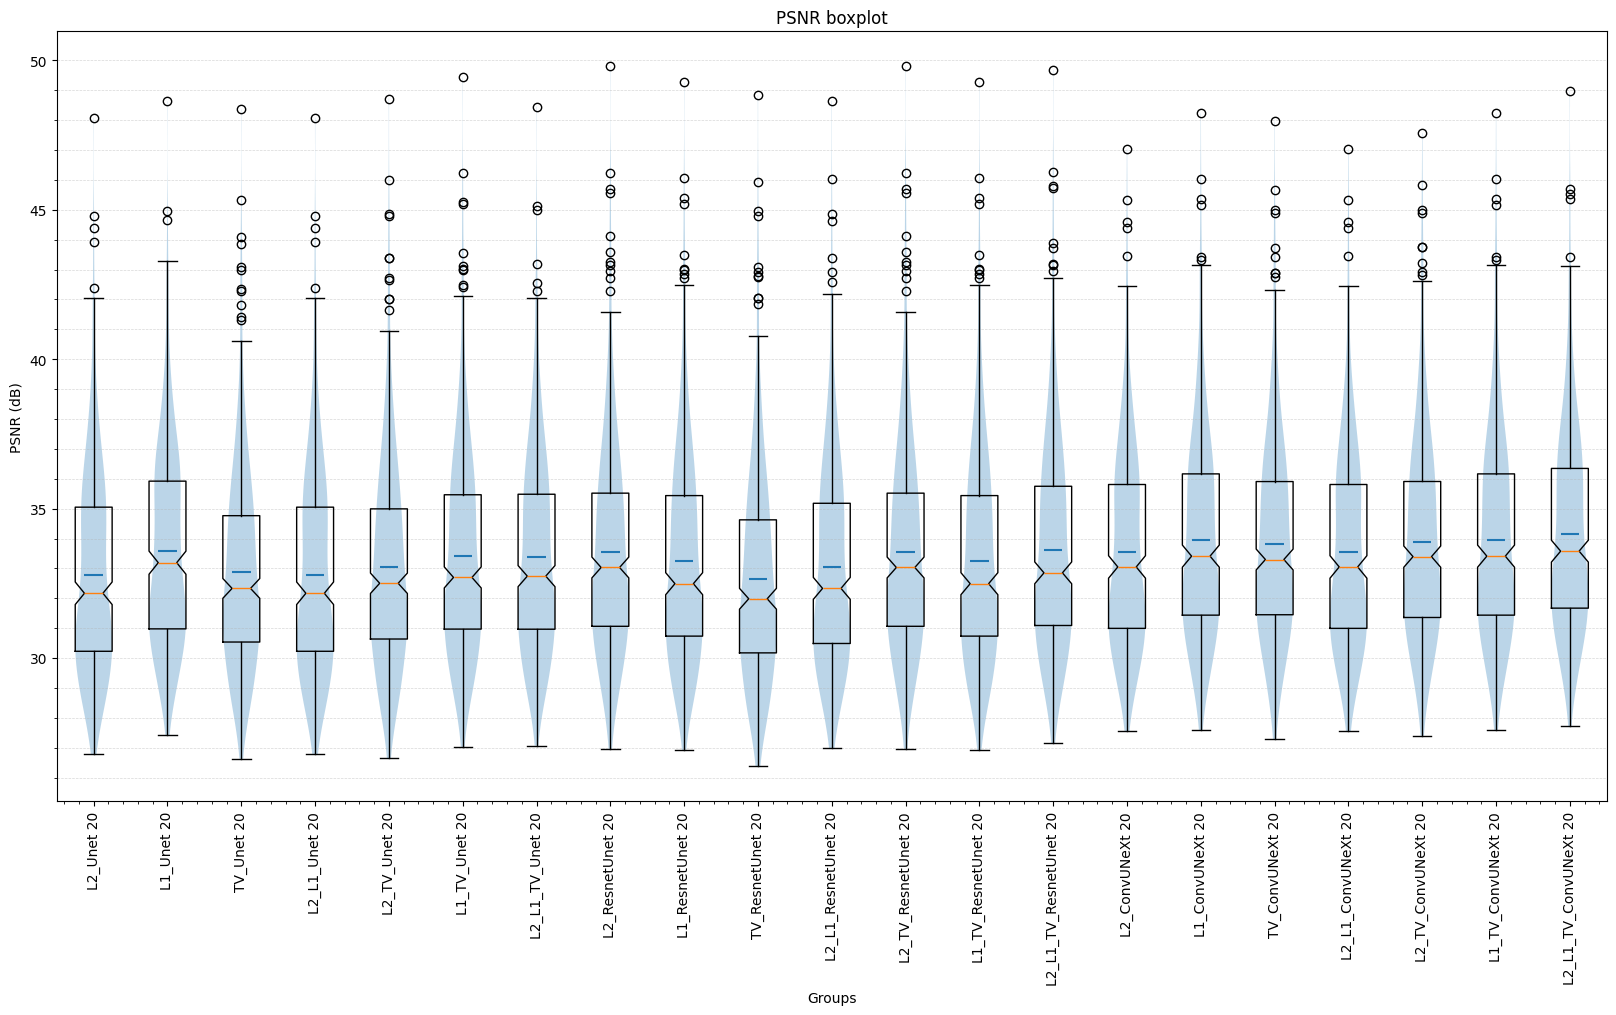

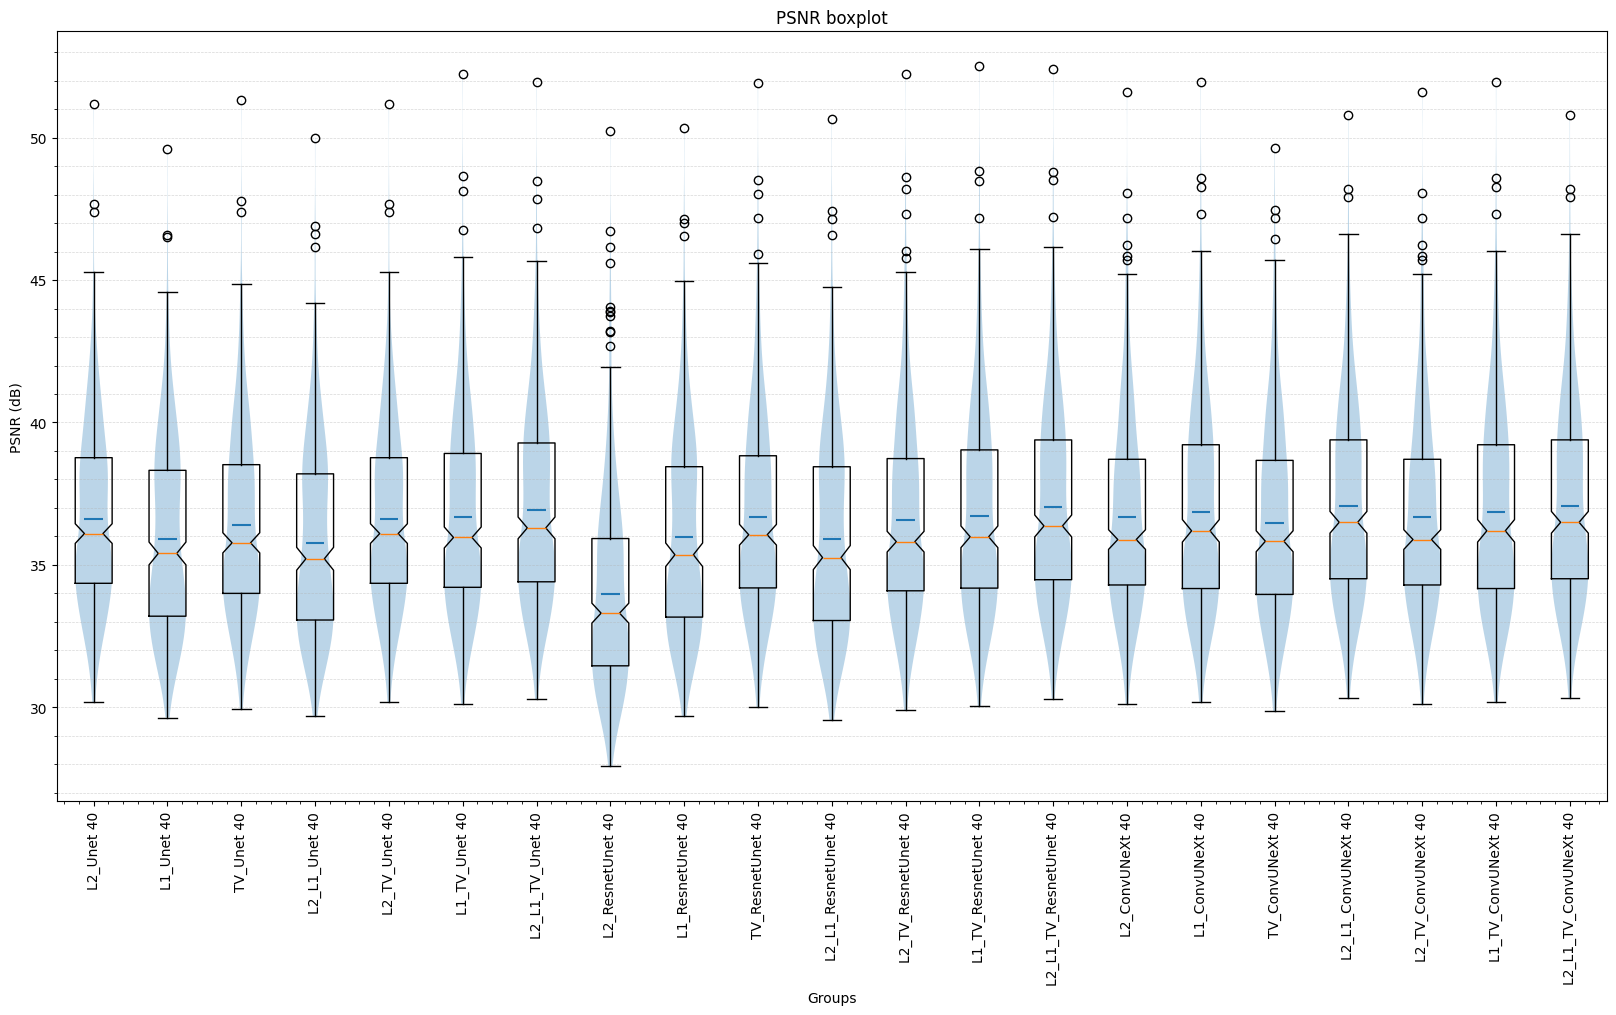

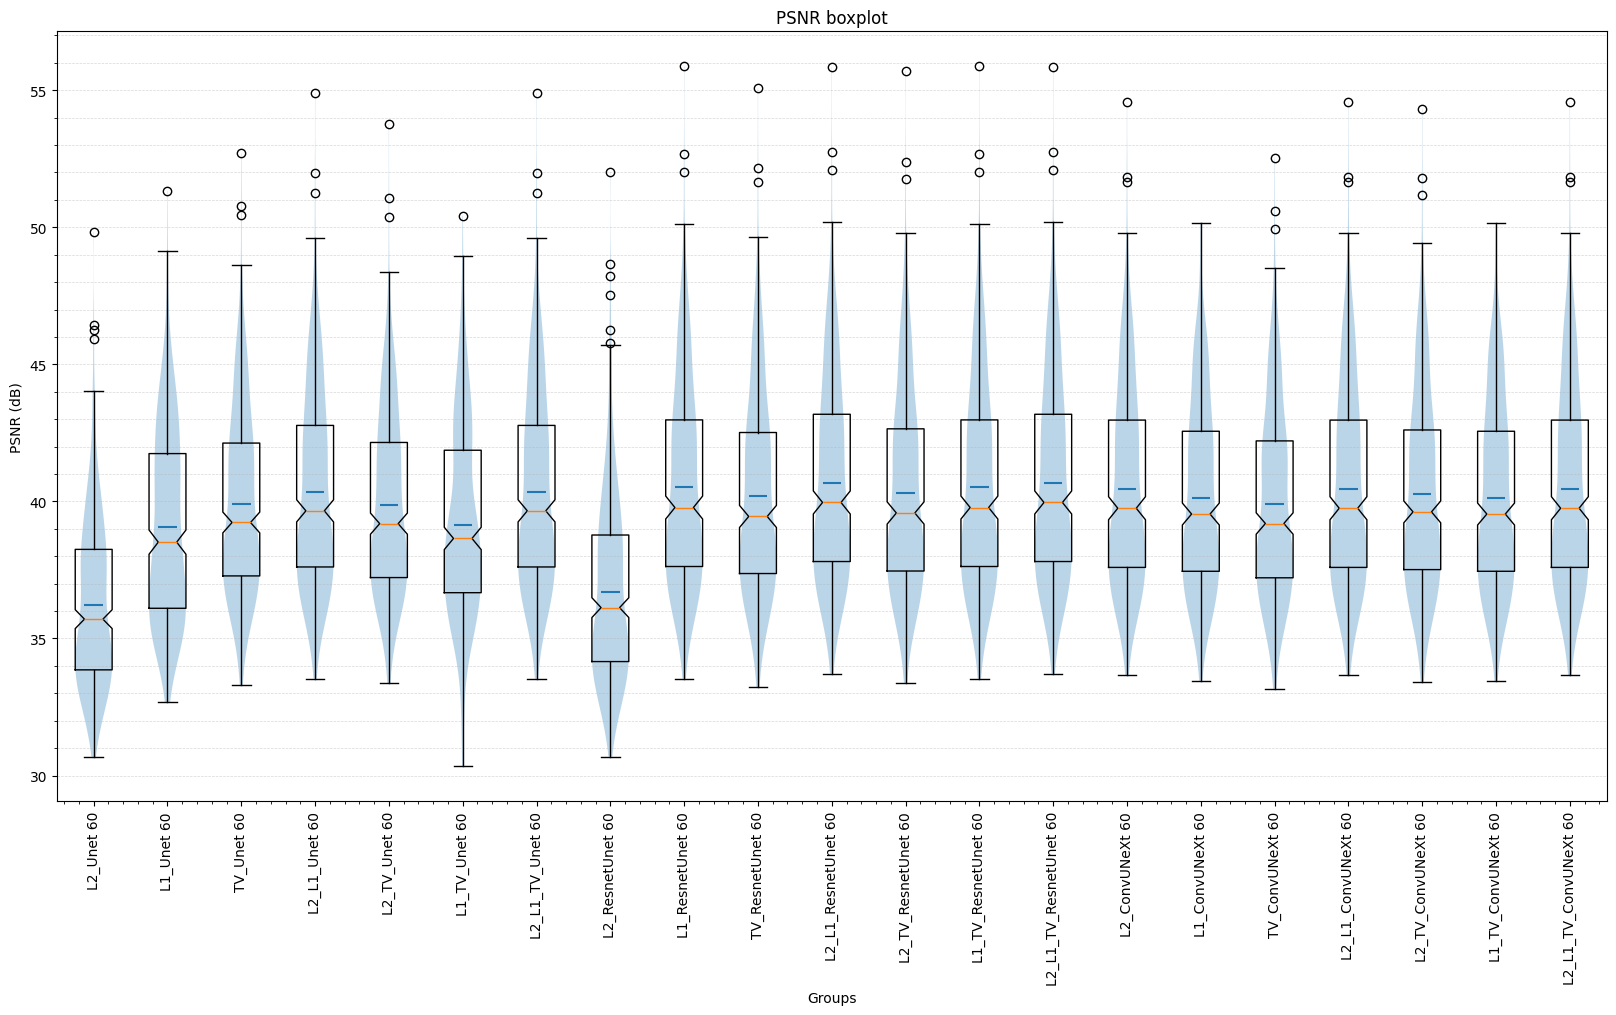

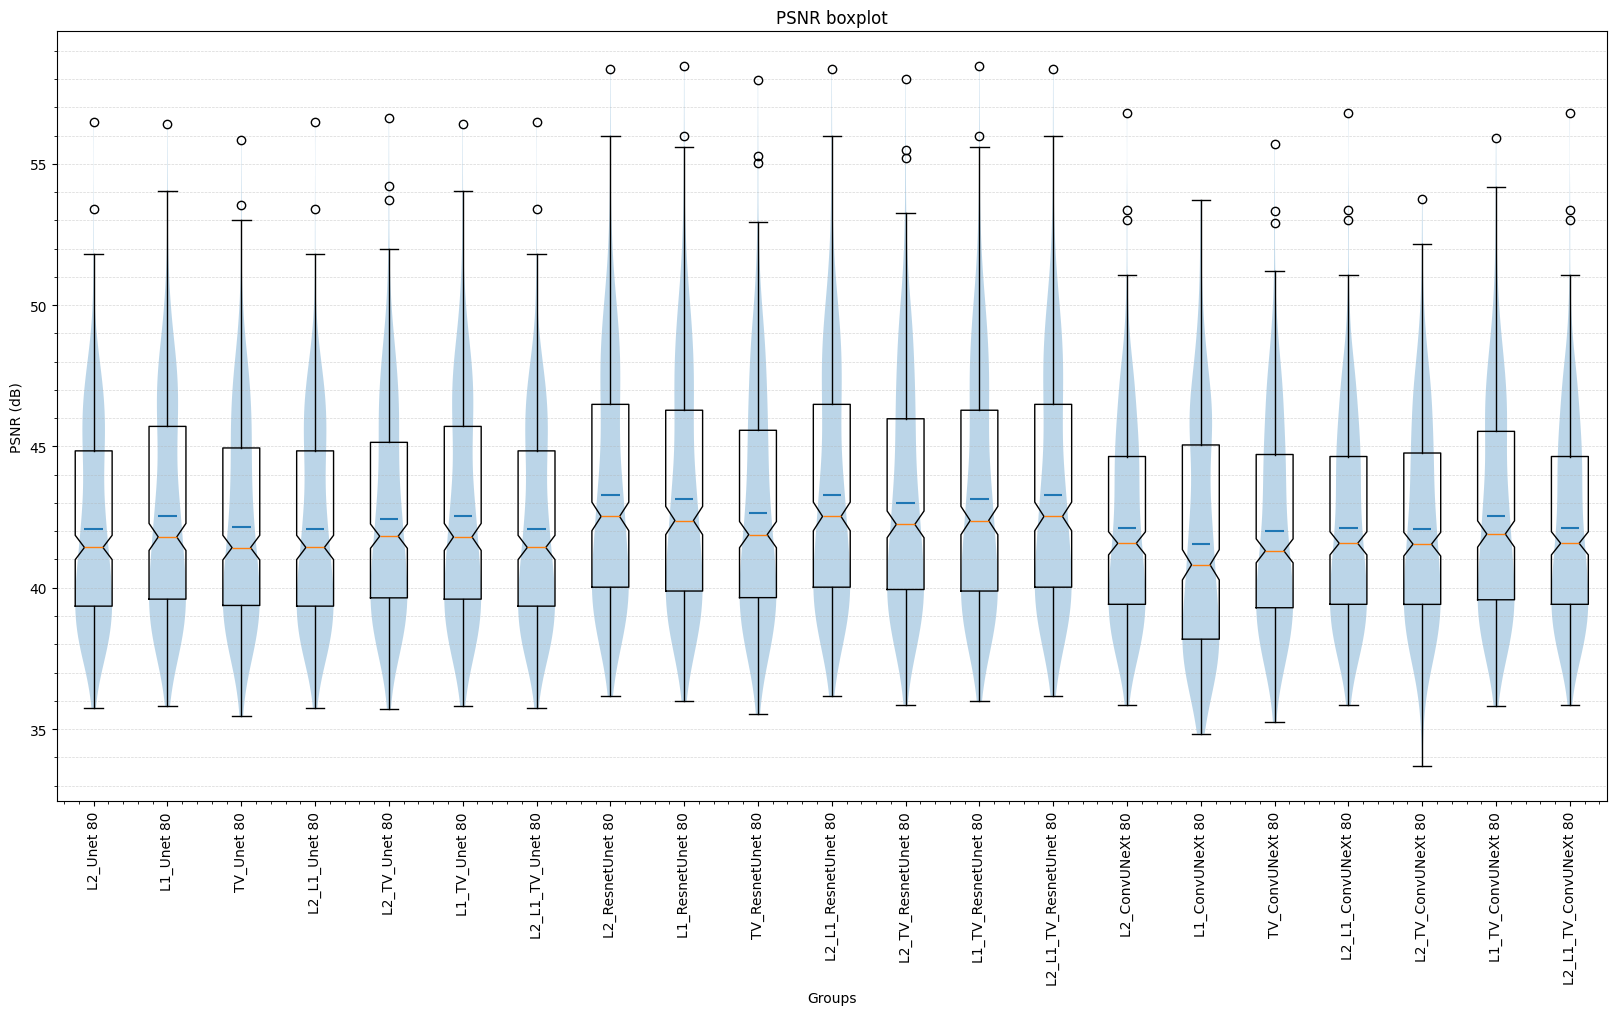

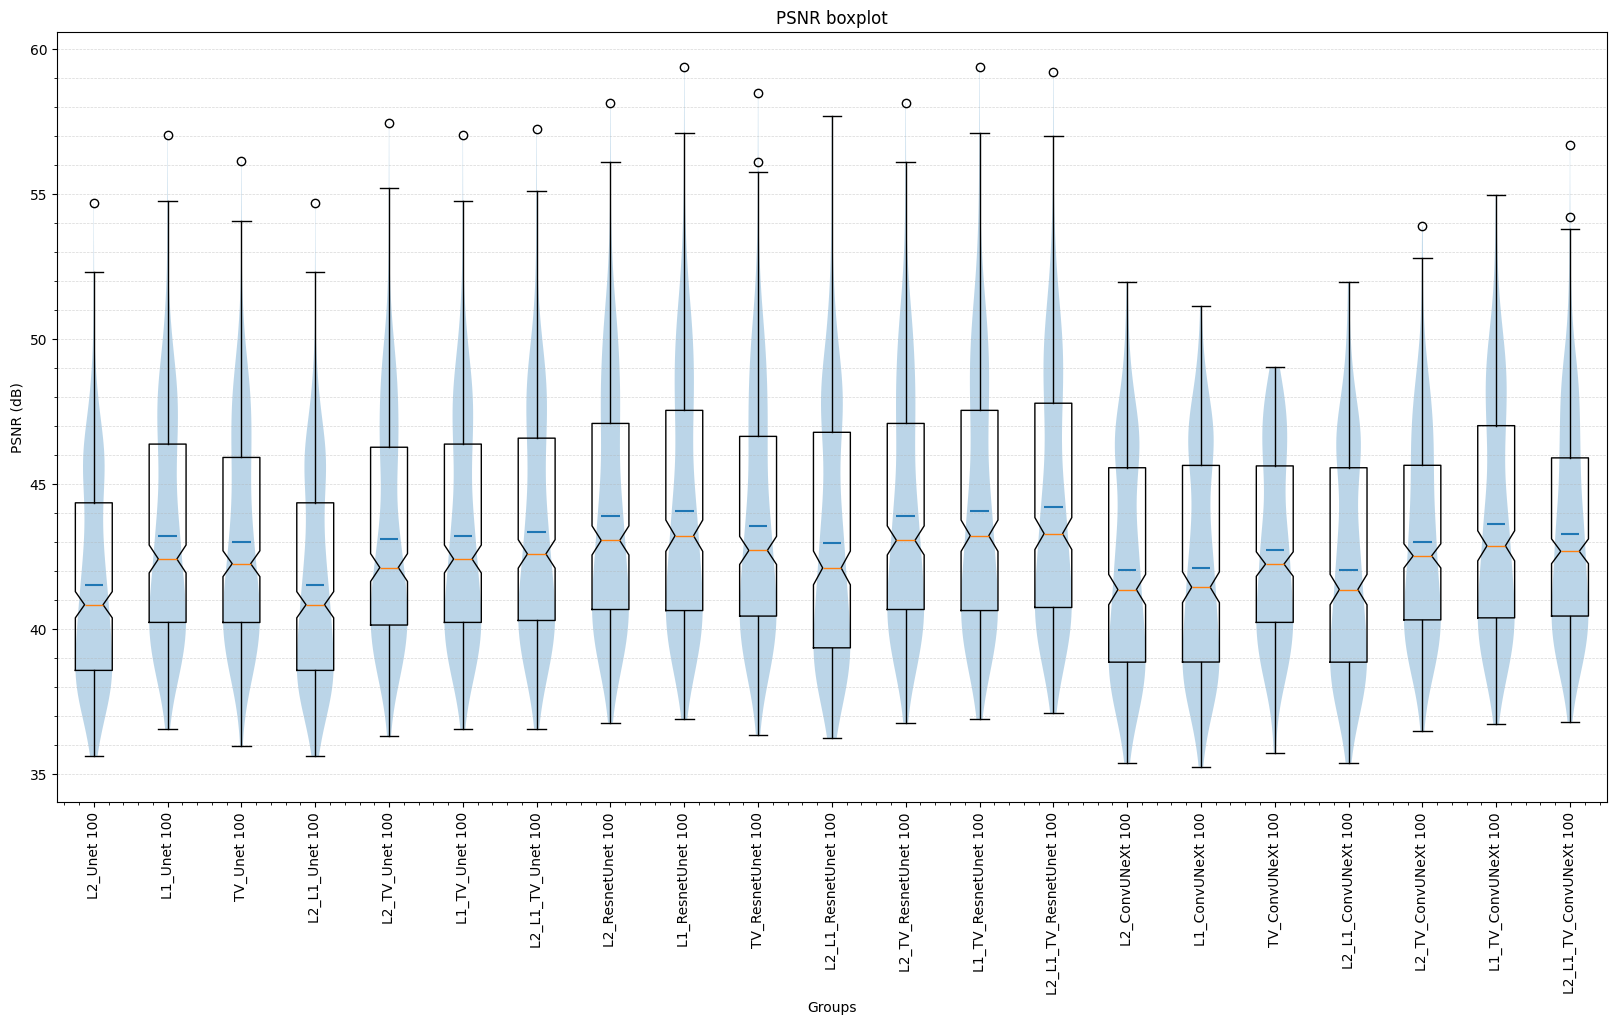

In [19]:

results_path = 'result_images/'
folders = os.listdir(results_path)
folders = [f for f in folders if f.endswith('epochs')]
lists_all = []#lists1, lists2, lists3, ...]

data_psnr = {}
data_ssim = {}
data_lpips = {}
labels = {}

for i, row in df.iterrows():
    if 1:
        unet = row['unet']
        rl = row['radial_lines']
        rec = row['reconstruction']
        folder_start = f'{unet}_{rl}lines_{rec}'
        folder_name = [results_path+f for f in folders if f.startswith(folder_start)][0]
        match = re.search(r'\d+', folder_name[::-1])
        epochs = int(match.group()[::-1])
        df.at[i, 'epochs'] = int(epochs)
        df.at[i, 'folder'] = folder_name
        
        csv = f'{folder_name}/metrics.csv'
        csv_df = pd.read_csv(csv)

        if rl not in data_psnr:
            data_psnr[rl] = []
        if rl not in data_ssim:
            data_ssim[rl] = []
        if rl not in data_lpips:
            data_lpips[rl] = []

        if rl not in labels:
            labels[rl] = []

        data_psnr[rl].append(csv_df['psnr'])
        data_ssim[rl].append(csv_df['ssim'])
        data_lpips[rl].append(csv_df['lpips'])
        labels[rl].append(f'{rec}_{unet} {rl}')
 
import matplotlib.pyplot as plt
import numpy as np
rls = [20,40,60,80,100]
for rl in rls:
    plt.figure(figsize=(20,10))
    plt.boxplot(data_psnr[rl], labels=labels[rl], notch=True)
    plt.violinplot(data_psnr[rl], showmeans=True, showextrema=False, showmedians=False)
    plt.xticks(np.arange(1, len(labels[rl]) + 1), labels[rl], rotation=90)
    
    #plt.ylim(30,45)
    plt.grid(axis='y', linestyle='--', linewidth=0.5, which='both', alpha=0.5)
    plt.minorticks_on()

    
    plt.title('PSNR boxplot')
    plt.xlabel('Groups')
    plt.ylabel('PSNR (dB)')



20
7
L2_Unet 20 L2_Unet 20 1.0
L2_Unet 20 TV_Unet 20 0.6879863605451036
L2_Unet 20 L2_L1_Unet 20 1.0
L2_Unet 20 L2_TV_Unet 20 0.2802456577561972
L1_Unet 20 L1_Unet 20 1.0
L1_Unet 20 L1_TV_Unet 20 0.4369539913022874
L1_Unet 20 L2_L1_TV_Unet 20 0.39239765420209594
TV_Unet 20 L2_Unet 20 0.6879863605451036
TV_Unet 20 TV_Unet 20 1.0
TV_Unet 20 L2_L1_Unet 20 0.6879863605451036
TV_Unet 20 L2_TV_Unet 20 0.48701075578246167
L2_L1_Unet 20 L2_Unet 20 1.0
L2_L1_Unet 20 TV_Unet 20 0.6879863605451036
L2_L1_Unet 20 L2_L1_Unet 20 1.0
L2_L1_Unet 20 L2_TV_Unet 20 0.2802456577561972
L2_TV_Unet 20 L2_Unet 20 0.2802456577561972
L2_TV_Unet 20 TV_Unet 20 0.48701075578246167
L2_TV_Unet 20 L2_L1_Unet 20 0.2802456577561972
L2_TV_Unet 20 L1_TV_Unet 20 0.14454534887346634
L2_TV_Unet 20 L2_L1_TV_Unet 20 0.15675756344651362
L1_TV_Unet 20 L1_Unet 20 0.4369539913022874
L1_TV_Unet 20 L2_TV_Unet 20 0.14454534887346634
L1_TV_Unet 20 L1_TV_Unet 20 1.0
L1_TV_Unet 20 L2_L1_TV_Unet 20 0.9482412971720392
L2_L1_TV_Unet 20 L1_

<Axes: >

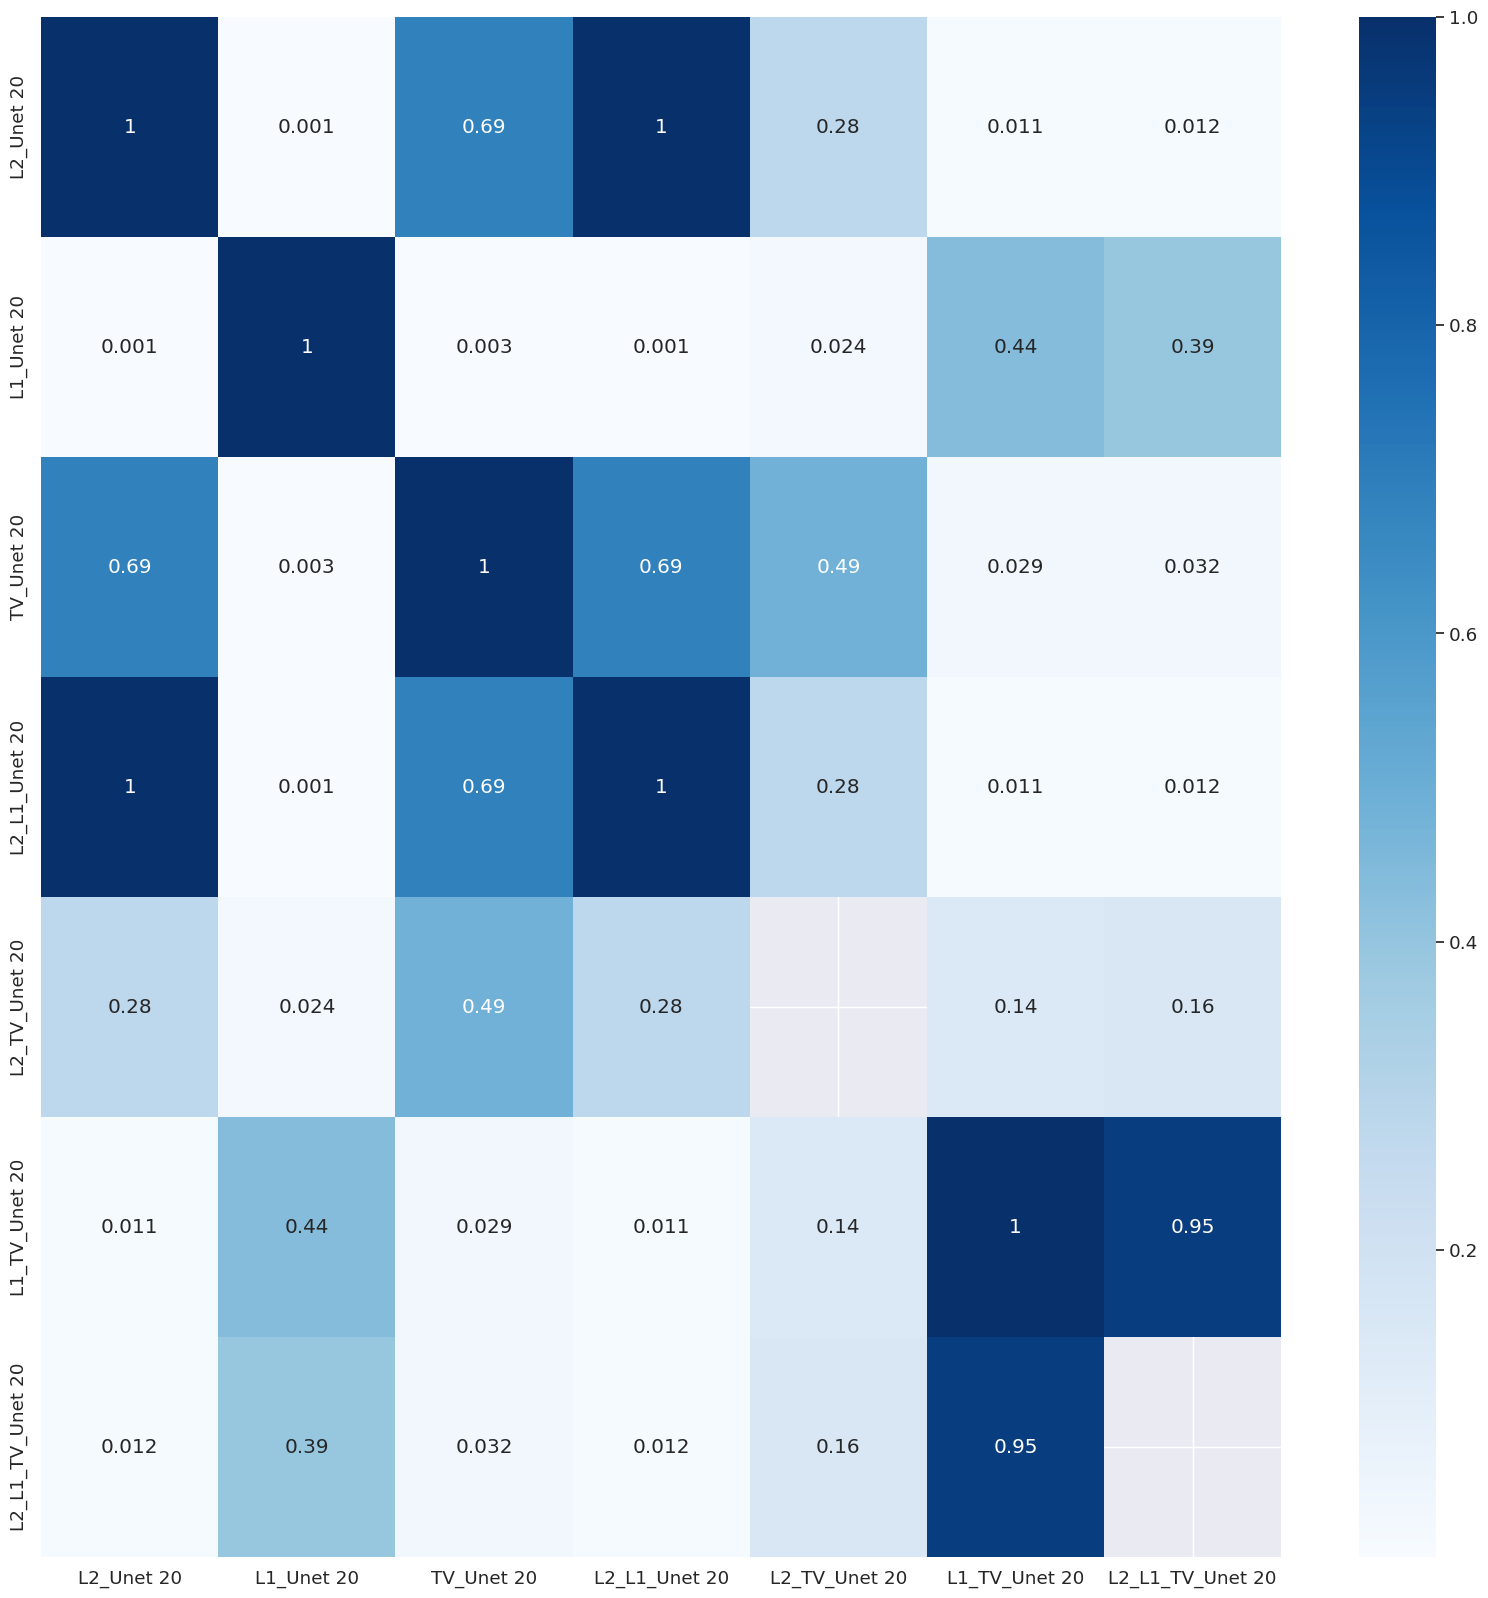

In [52]:
import scipy.stats as stats
import seaborn as sns

rls = [20]#,40,60,80,100]
for rl in rls:
    print(rl)
    data = data_psnr[rl][:7]
    print(len(data))
    p_values = np.zeros((len(data),len(data)))
    for i in range(len(data)):
        for j in range(len(data)):
            if 1:#i<j:
                statistic, p_value = stats.f_oneway(data[i], data[j])
                p_values[i,j] = round(p_value,3)
                if p_value>0.05: #no evidence that the mean is different (same mean?)
                    print(labels[rl][i],labels[rl][j],p_value)#, end=',')
plt.figure(figsize=(20, 20))
sns.set(font_scale=1.2)  # Adjust font size

sns.heatmap(p_values, annot=True, cmap="Blues", xticklabels=labels[rl][:7], yticklabels=labels[rl][:7])


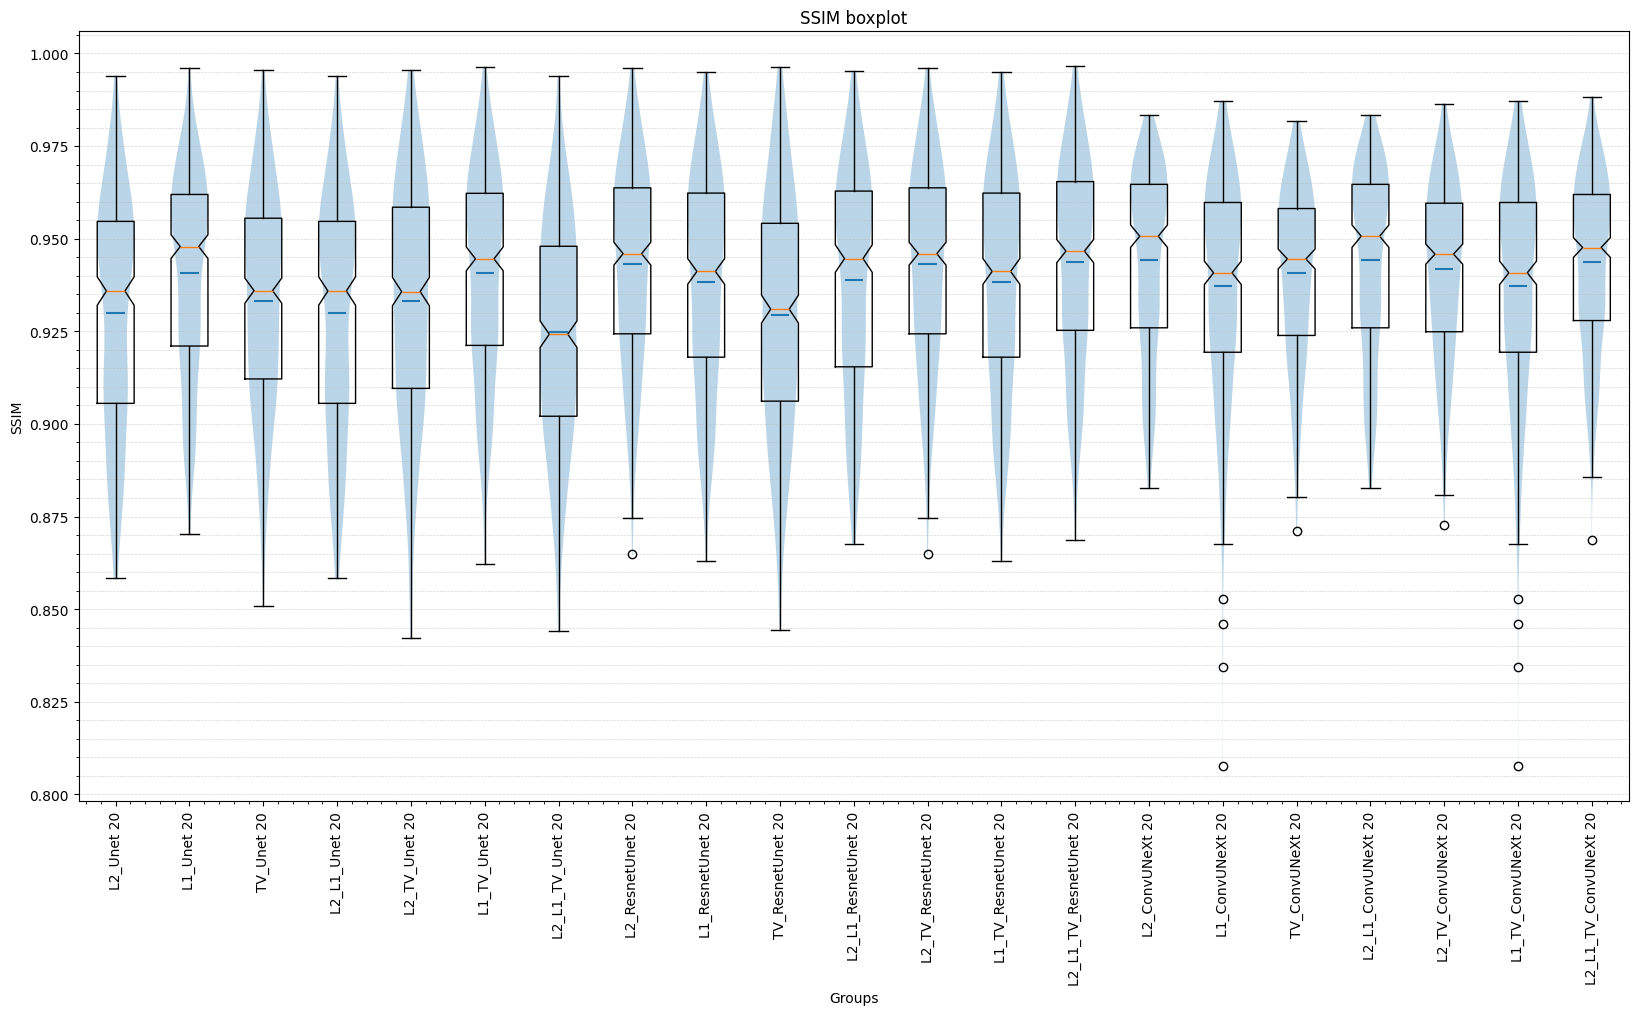

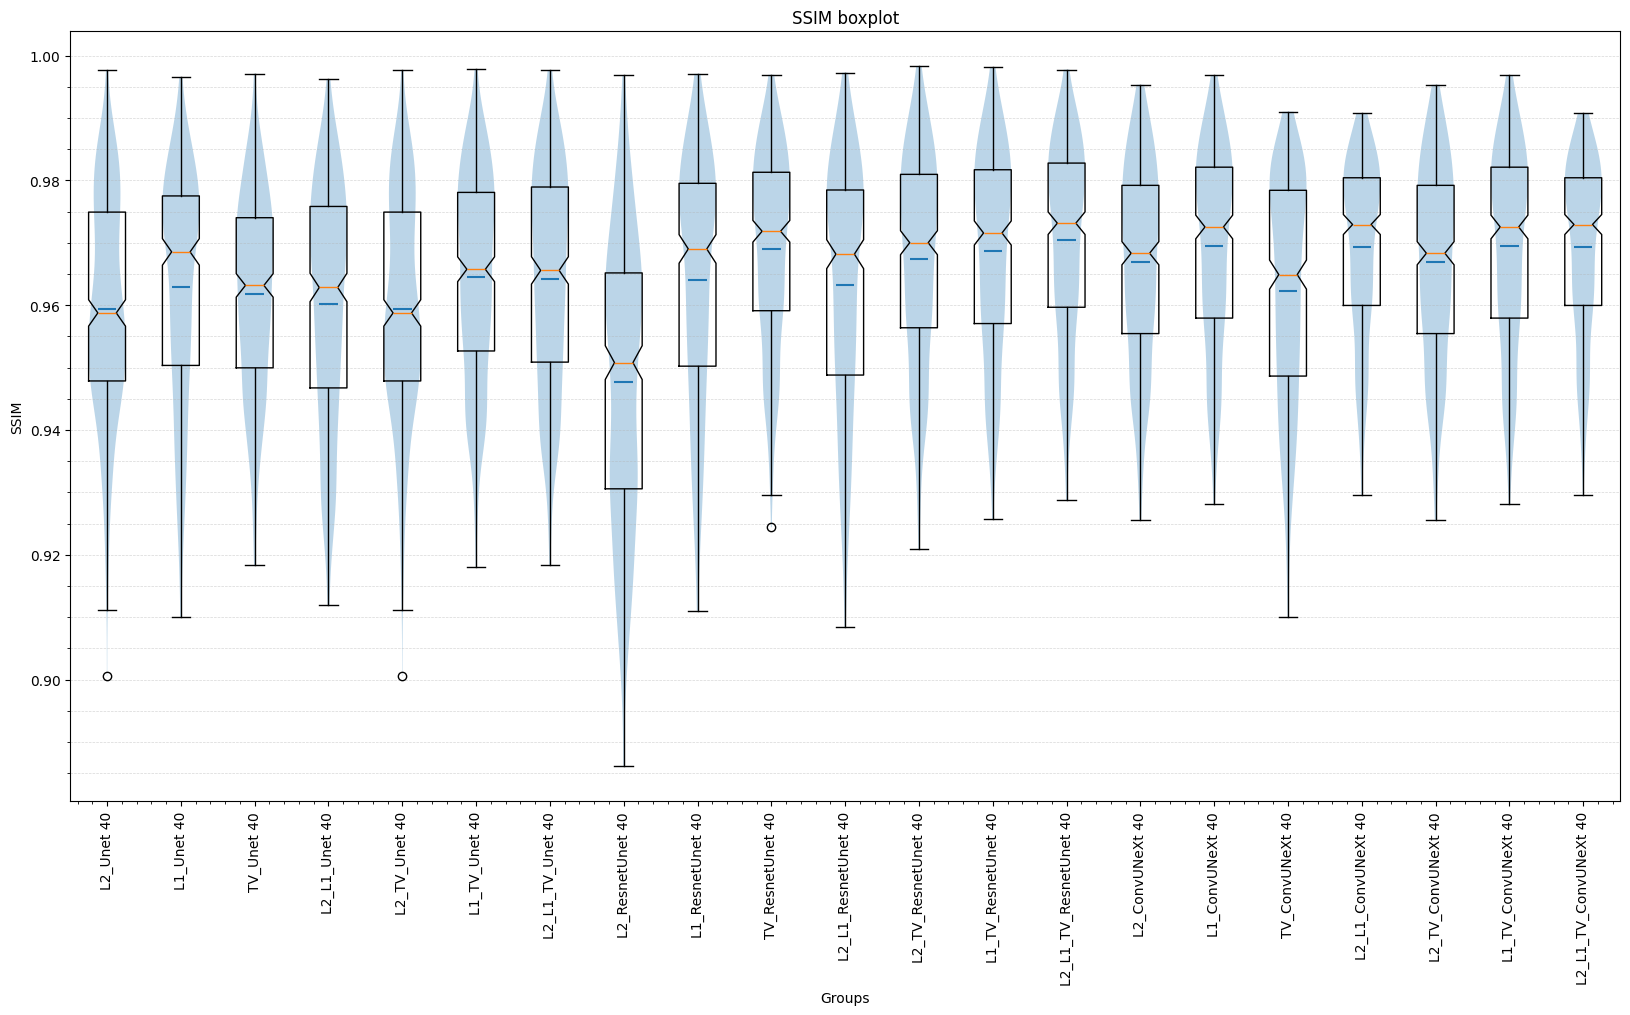

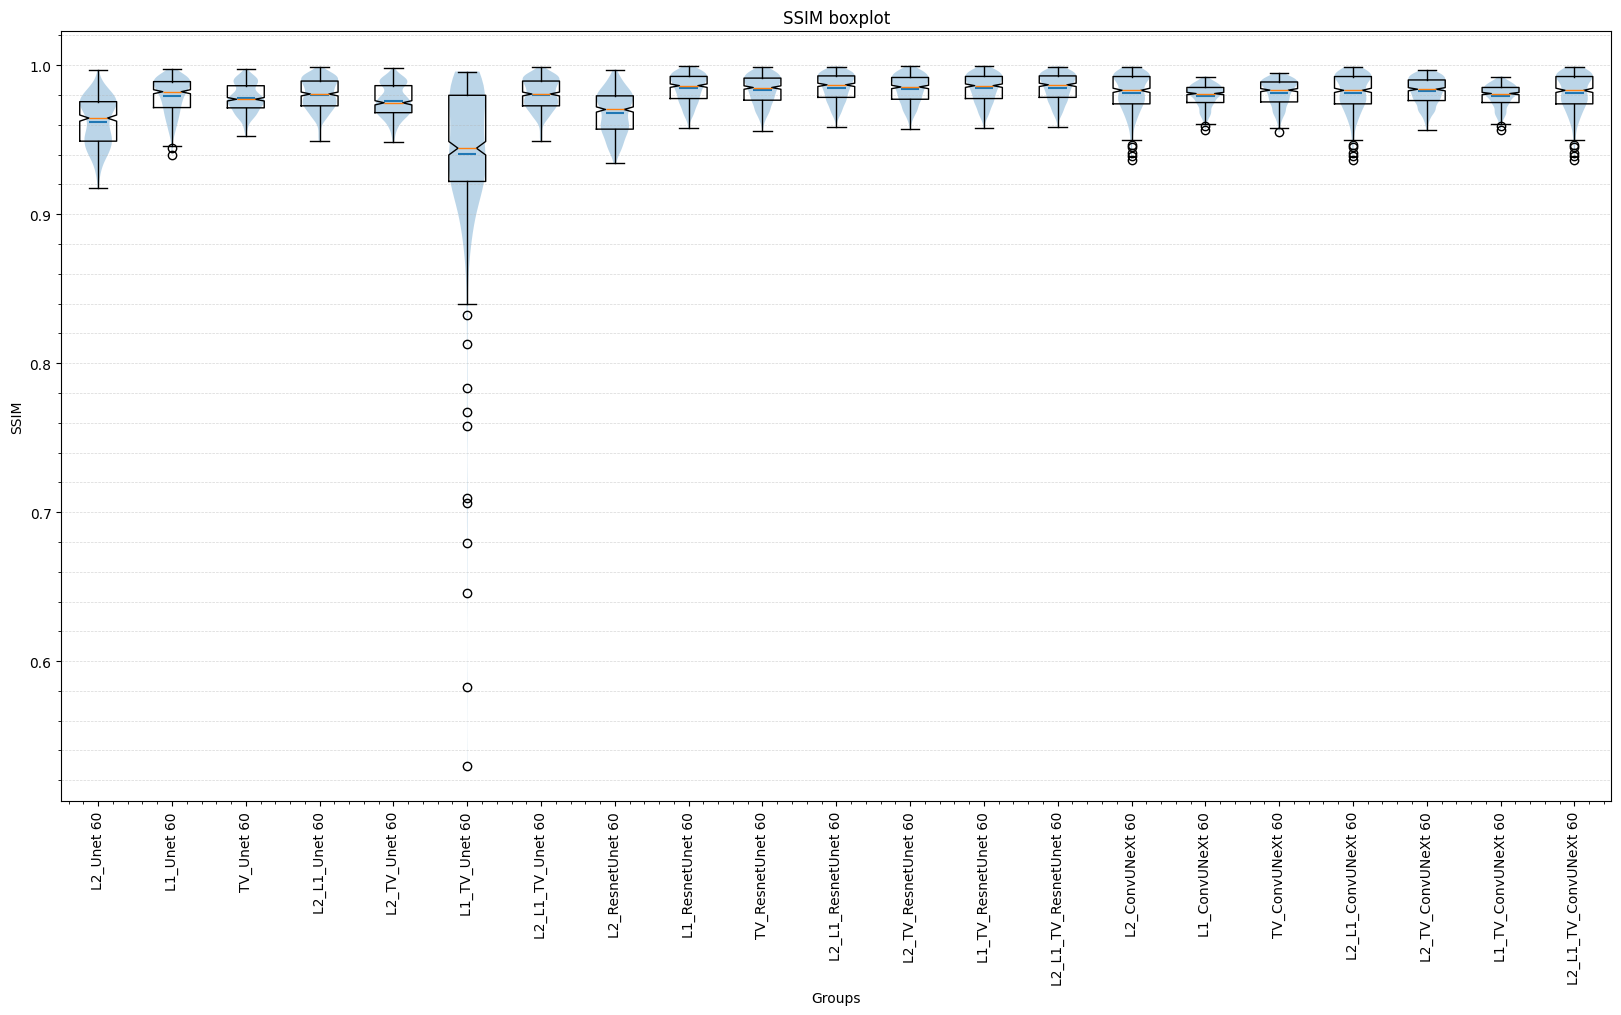

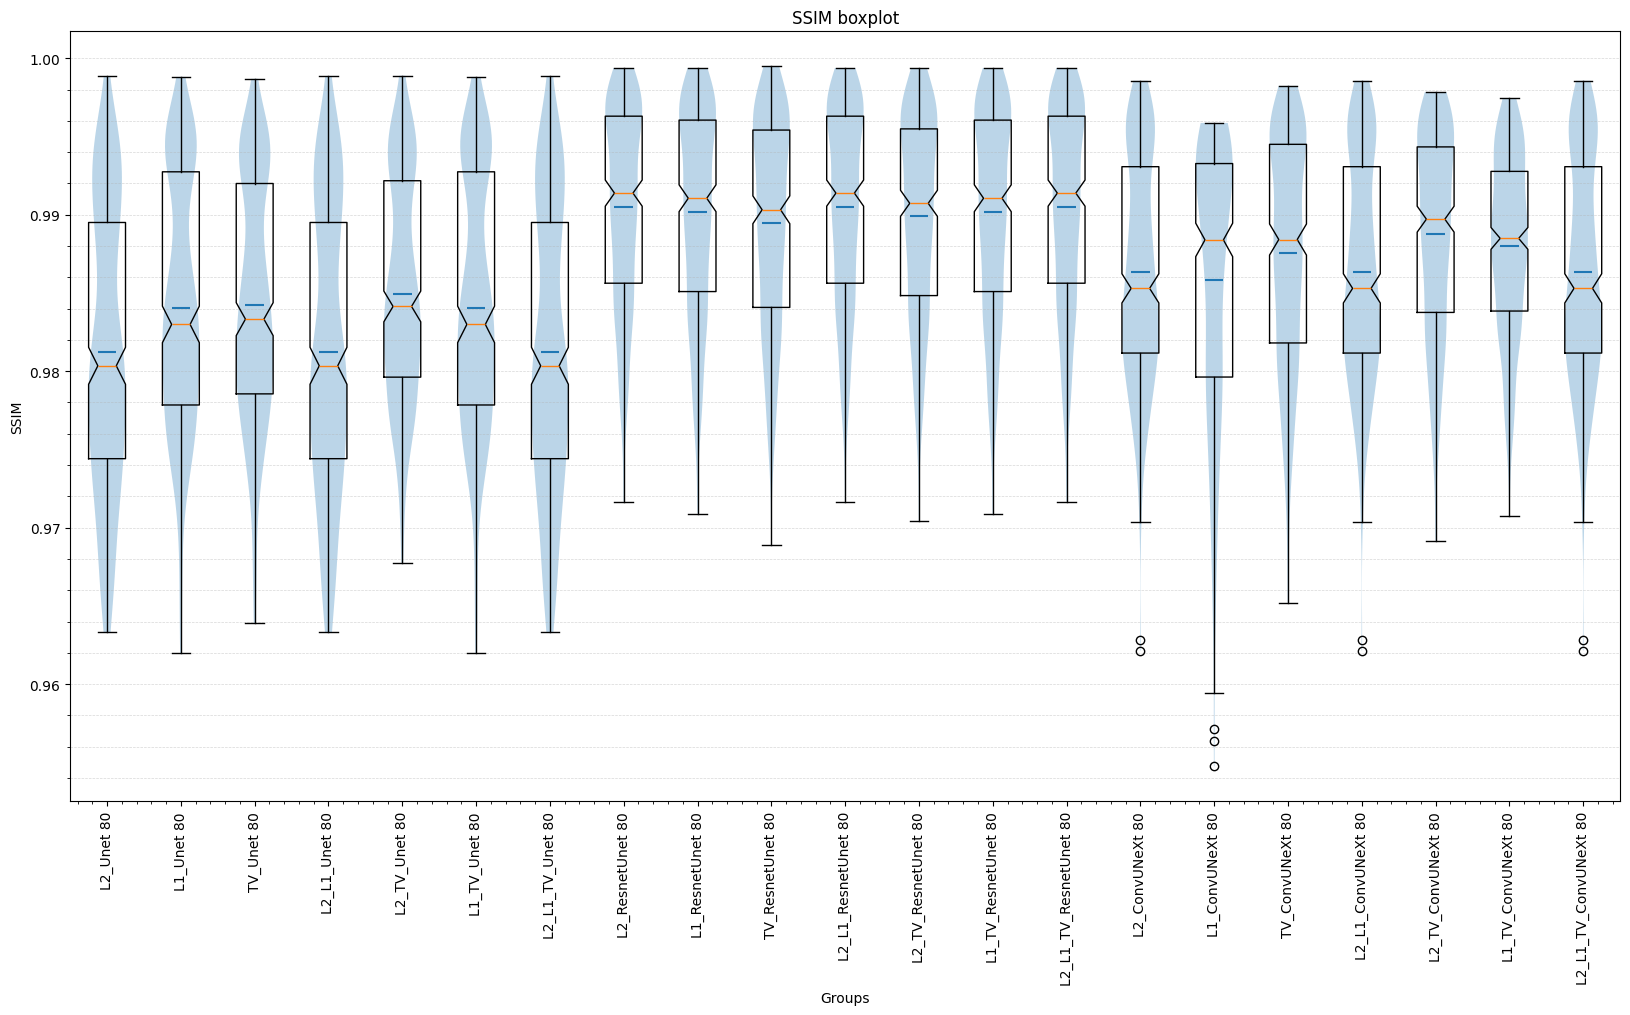

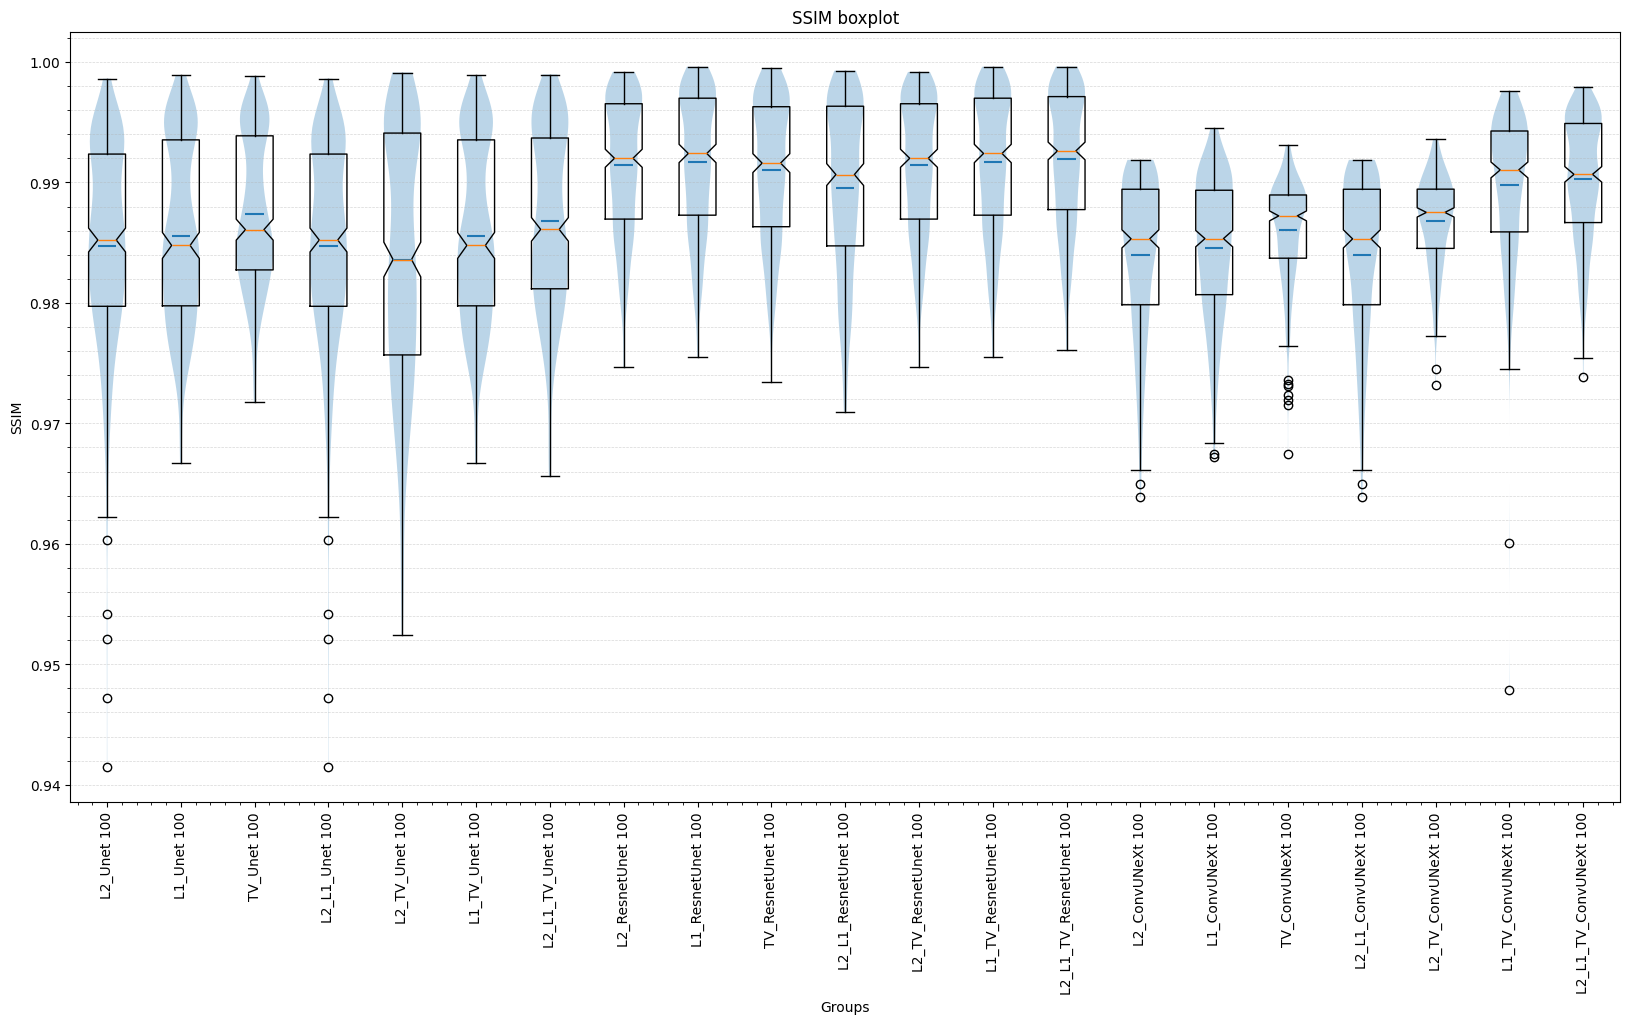

In [21]:
for rl in rls:
    plt.figure(figsize=(20,10))
    plt.boxplot(data_ssim[rl], labels=labels[rl], notch=True)
    plt.violinplot(data_ssim[rl], showmeans=True, showextrema=False, showmedians=False)
    plt.xticks(np.arange(1, len(labels[rl]) + 1), labels[rl], rotation=90)
    plt.xticks(rotation=90)


        #plt.ylim(30,45)
    plt.grid(axis='y', linestyle='--', linewidth=0.5, which='both', alpha=0.5)
    plt.minorticks_on()
    # Add labels and title
    plt.title('SSIM boxplot')
    plt.xlabel('Groups')
    plt.ylabel('SSIM')


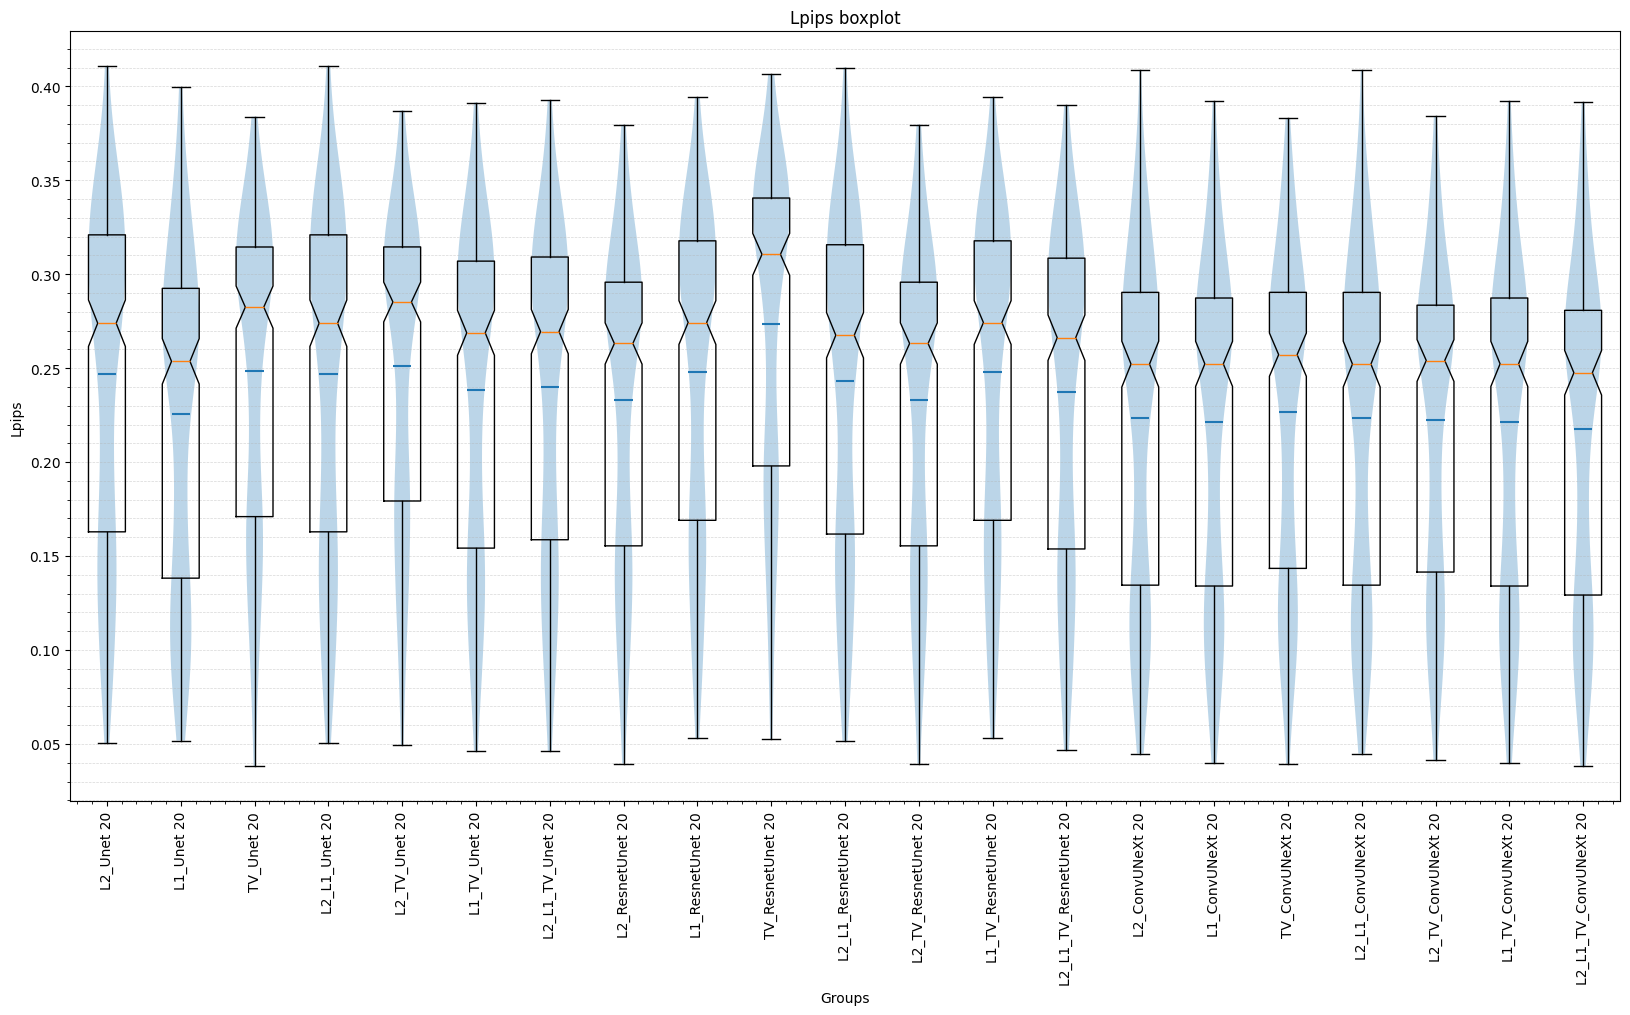

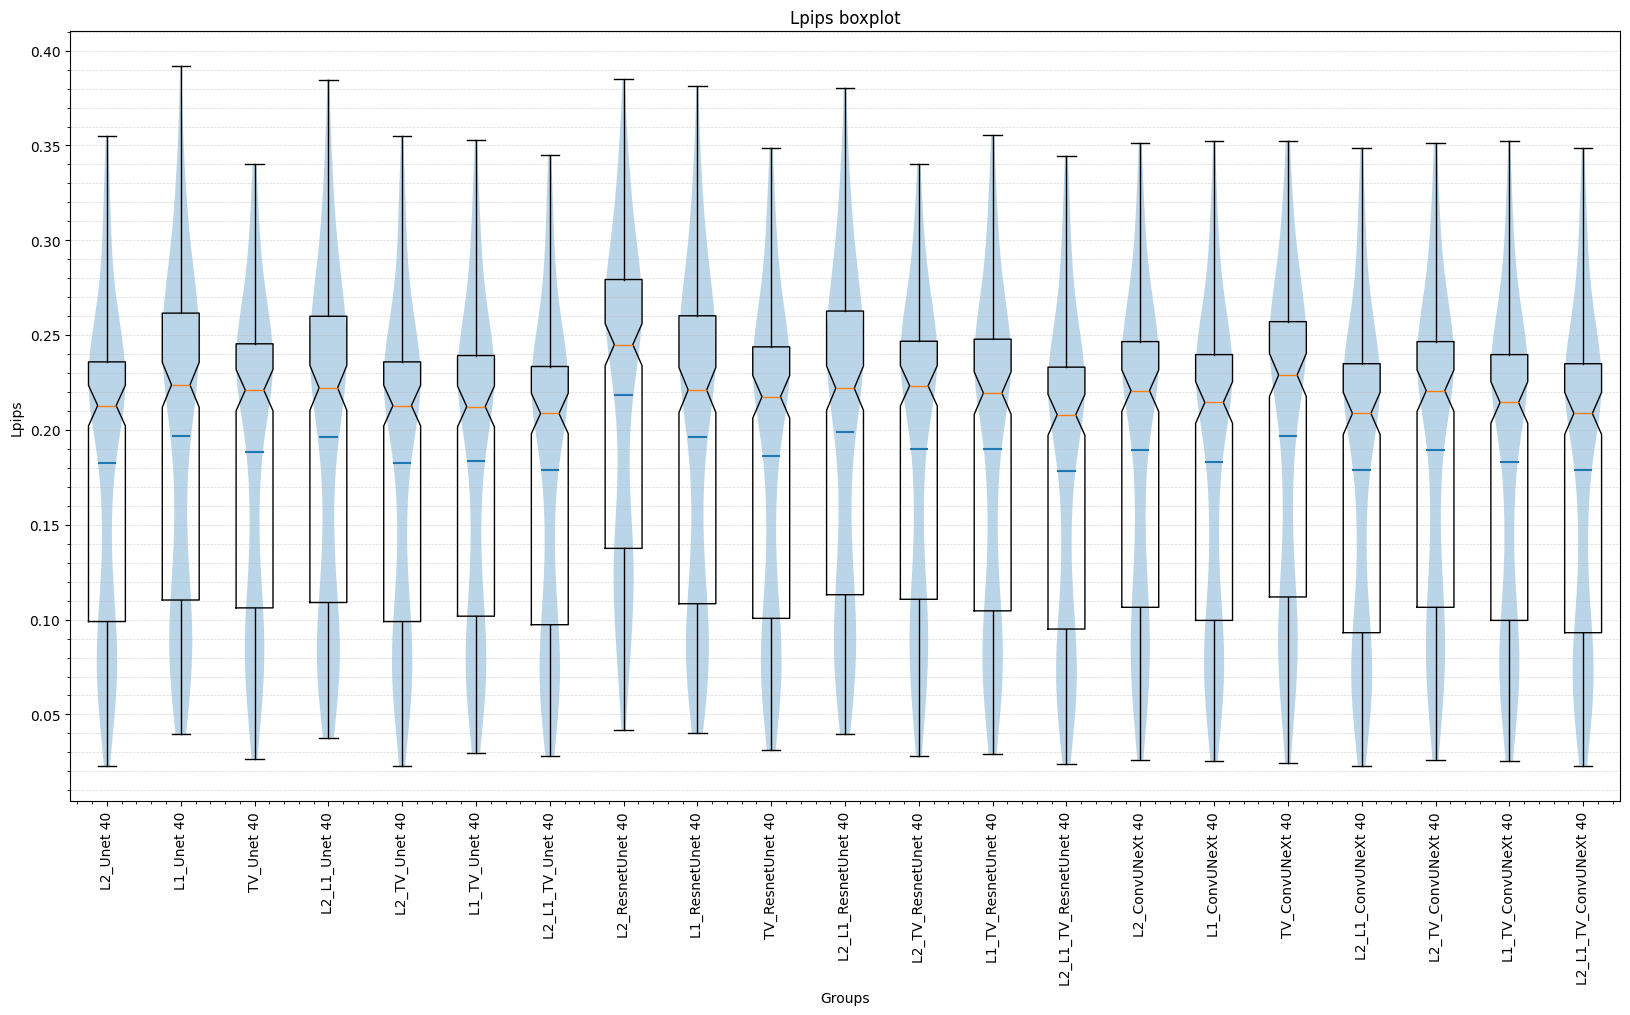

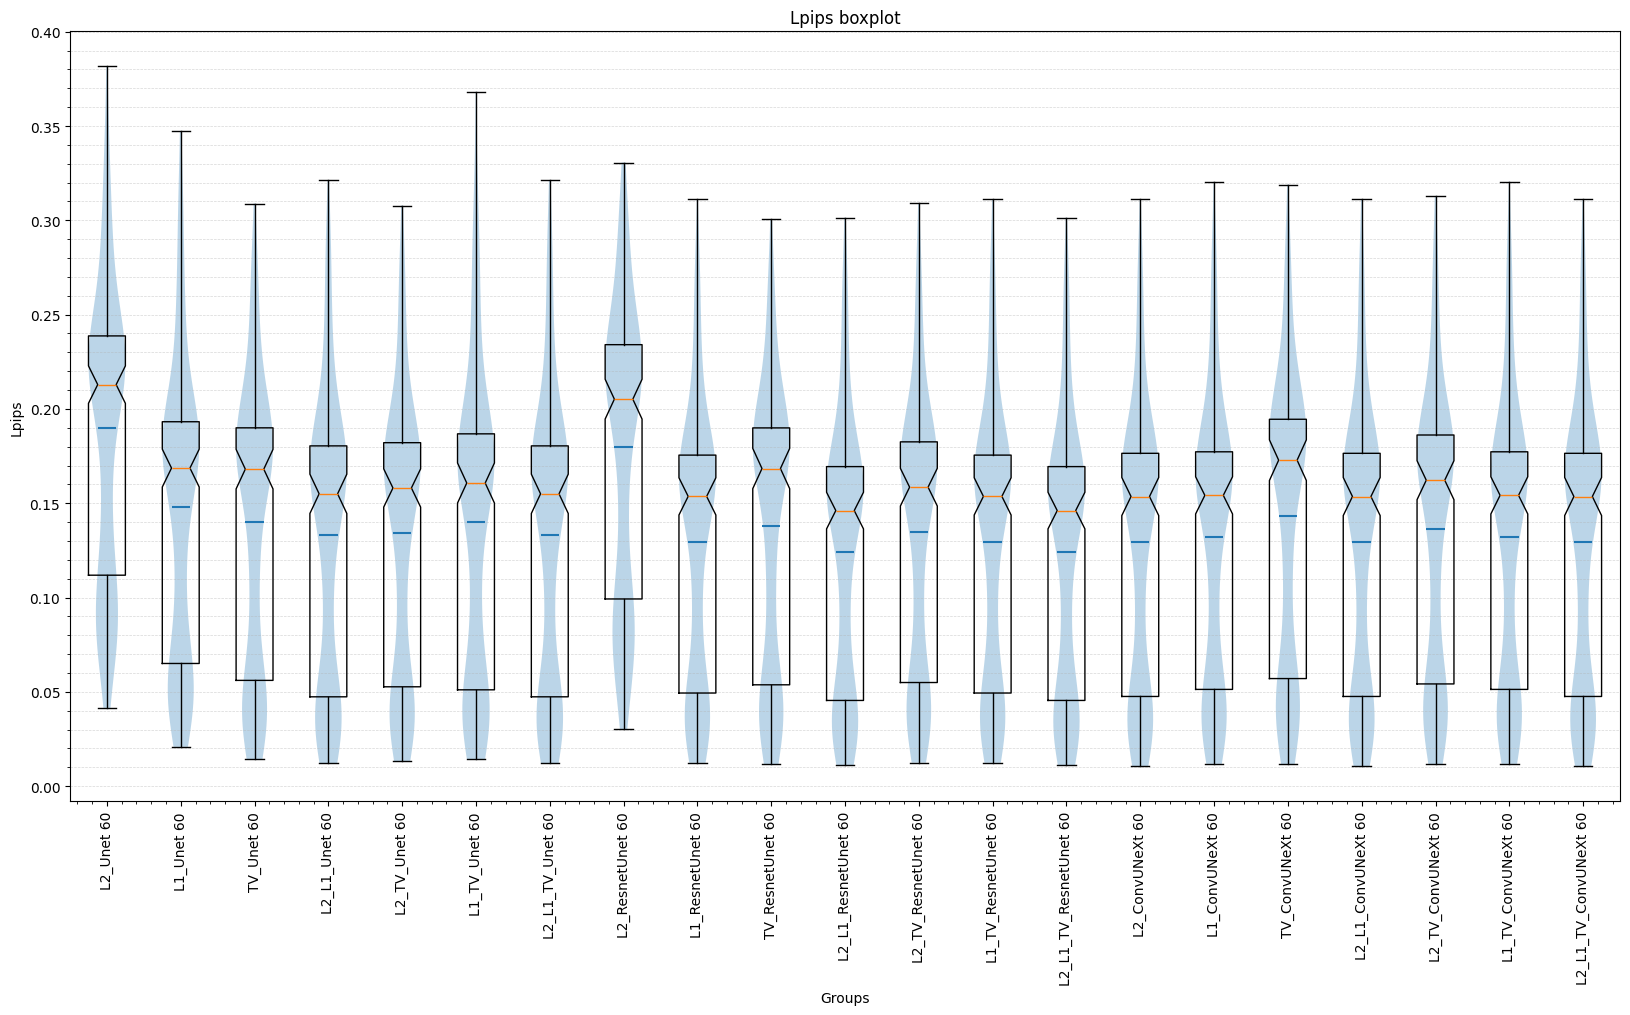

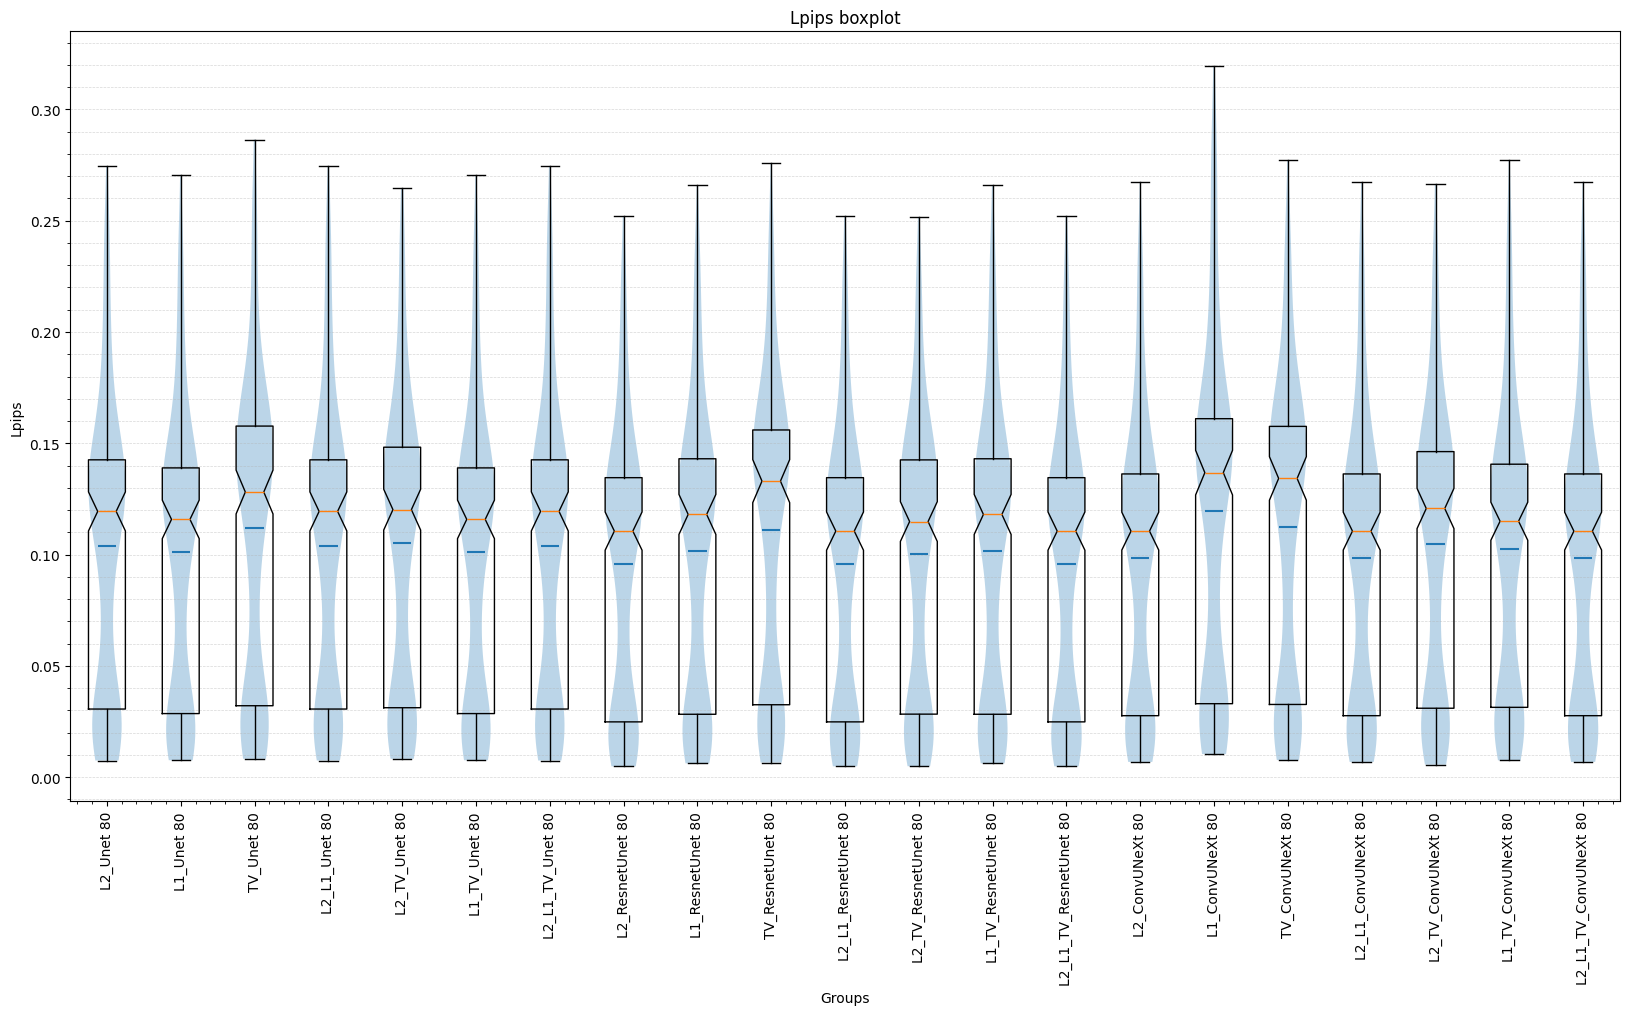

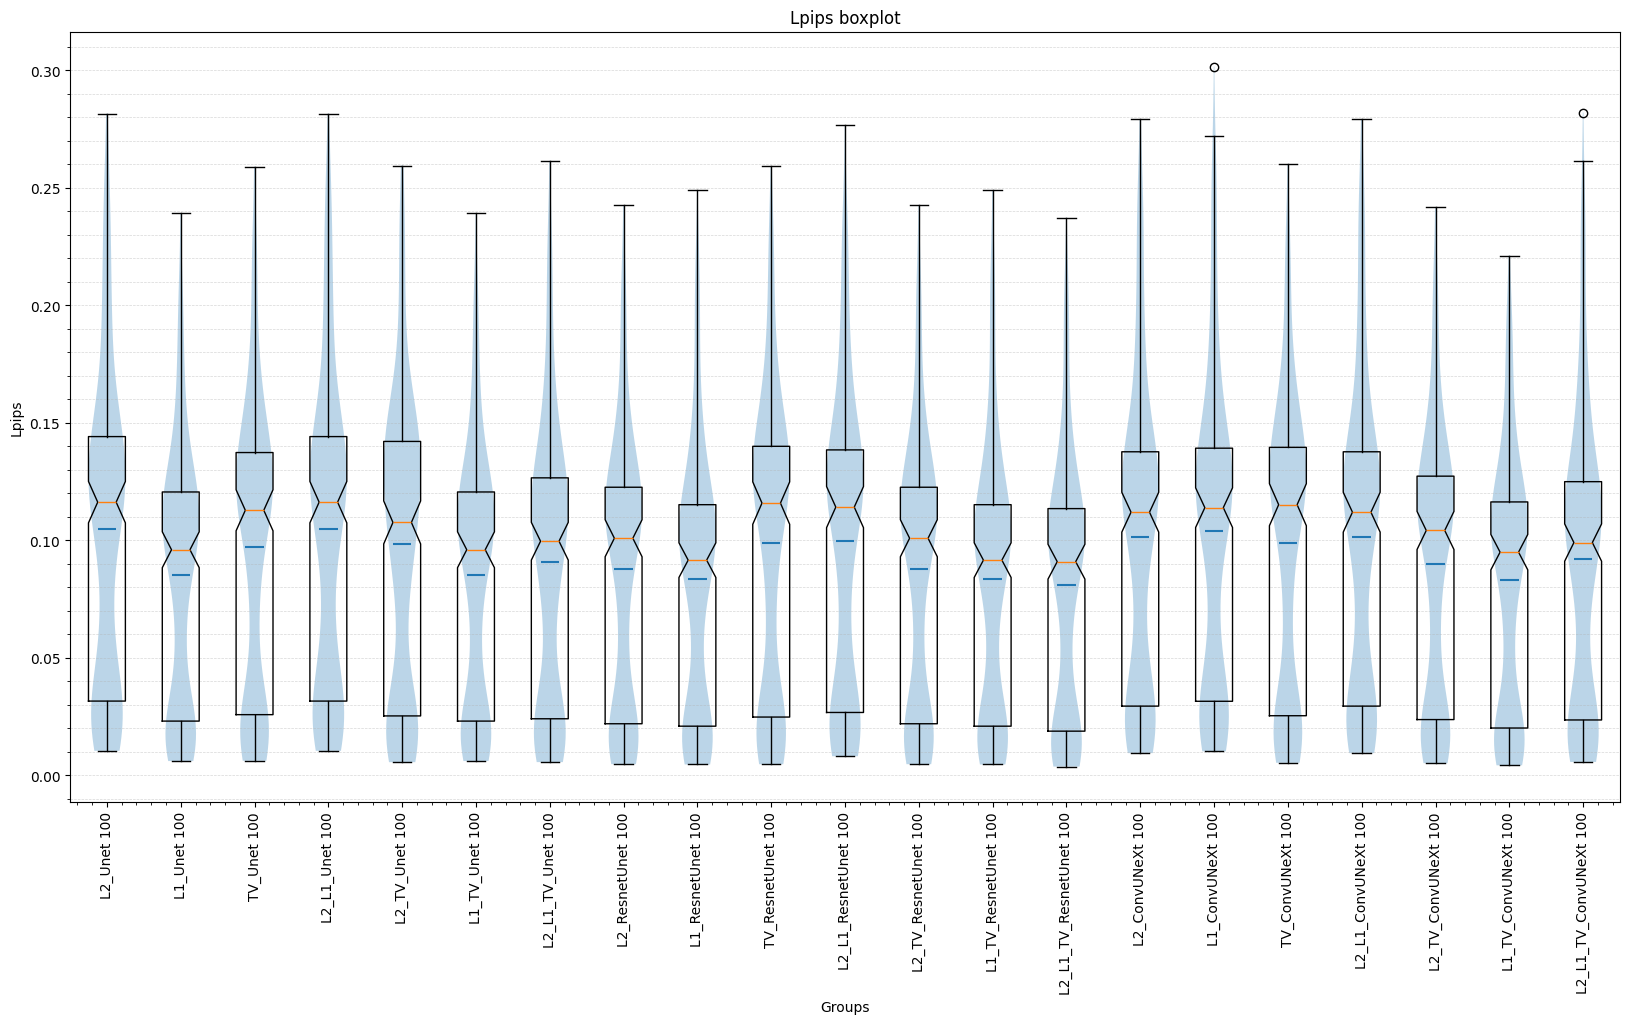

In [22]:
for rl in rls:
    plt.figure(figsize=(20,10))
    plt.boxplot(data_lpips[rl], labels=labels[rl], notch=True)
    plt.violinplot(data_lpips[rl], showmeans=True, showextrema=False, showmedians=False)
    plt.xticks(np.arange(1, len(labels[rl]) + 1), labels[rl], rotation=90)

    #plt.ylim(30,45)
    plt.grid(axis='y', linestyle='--', linewidth=0.5, which='both', alpha=0.5)
    plt.minorticks_on()
    # Add labels and title
    plt.title('Lpips boxplot')
    plt.xlabel('Groups')
    plt.ylabel('Lpips')


In [23]:

from itertools import permutations

def generate_permutations_in_ascending_order(n):
    numbers = list(range(n))
    ascending_permutations = []

    for r in range(1, n + 1):
        for perm in permutations(numbers, r):
            if all(perm[i] <= perm[i + 1] for i in range(len(perm) - 1)):
                ascending_permutations.append(list(perm))

    return ascending_permutations
len(generate_permutations_in_ascending_order(7))

127

In [24]:
from itertools import permutations

def generate_consecutive_permutations(n):
    numbers = list(range(n))
    consecutive_permutations = []

    for r in range(1, n + 1):
        for perm in permutations(numbers, r):
            if all(perm[i] + 1 == perm[i + 1] or perm[i] - 1 == perm[i + 1] for i in range(len(perm) - 1)):
                consecutive_permutations.append(list(perm))

    return consecutive_permutations

n=10
print(len(generate_permutations_in_ascending_order(n)))
print(len(generate_consecutive_permutations(n)))


1023
100


In [25]:
from itertools import permutations

def generate_consecutive_permutations(n):
    numbers = list(range(n))
    consecutive_permutations = []

    for r in range(1, n + 1):
        consecutive_permutations.extend(
            list(perm) for perm in permutations(numbers, r)
            if all(perm[i] + 1 == perm[i + 1] or perm[i] - 1 == perm[i + 1] for i in range(len(perm) - 1))
        )

    return consecutive_permutations

result = list(generate_consecutive_permutations(7))
print(len(result))
print(result)
print(len(generate_consecutive_permutations(n)))



49
[[0], [1], [2], [3], [4], [5], [6], [0, 1], [1, 0], [1, 2], [2, 1], [2, 3], [3, 2], [3, 4], [4, 3], [4, 5], [5, 4], [5, 6], [6, 5], [0, 1, 2], [1, 2, 3], [2, 1, 0], [2, 3, 4], [3, 2, 1], [3, 4, 5], [4, 3, 2], [4, 5, 6], [5, 4, 3], [6, 5, 4], [0, 1, 2, 3], [1, 2, 3, 4], [2, 3, 4, 5], [3, 2, 1, 0], [3, 4, 5, 6], [4, 3, 2, 1], [5, 4, 3, 2], [6, 5, 4, 3], [0, 1, 2, 3, 4], [1, 2, 3, 4, 5], [2, 3, 4, 5, 6], [4, 3, 2, 1, 0], [5, 4, 3, 2, 1], [6, 5, 4, 3, 2], [0, 1, 2, 3, 4, 5], [1, 2, 3, 4, 5, 6], [5, 4, 3, 2, 1, 0], [6, 5, 4, 3, 2, 1], [0, 1, 2, 3, 4, 5, 6], [6, 5, 4, 3, 2, 1, 0]]
100


In [26]:
import time
def measure_execution_time(func, *args, **kwargs):
    start_time = time.time()
    result = func(*args, **kwargs)
    end_time = time.time()
    elapsed_time = end_time - start_time
    return result, elapsed_time

# Example usage
result, elapsed_time = measure_execution_time(generate_consecutive_permutations, 10)
elapsed_time

4.8472418785095215

In [27]:
def generate_consecutive_sequences(n):
    result = []

    for start in range(n):
        for end in range(start, n):
            sequence = list(range(start, end + 1))
            result.append(sequence)

    result.sort(key=len)
    return result



# Example usage
result = generate_consecutive_sequences(7)
print("Number of sequences:", len(result))
print(result)


result, elapsed_time = measure_execution_time(generate_consecutive_sequences, 7)
print(elapsed_time)
print(len(result))

Number of sequences: 28
[[0], [1], [2], [3], [4], [5], [6], [0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [0, 1, 2], [1, 2, 3], [2, 3, 4], [3, 4, 5], [4, 5, 6], [0, 1, 2, 3], [1, 2, 3, 4], [2, 3, 4, 5], [3, 4, 5, 6], [0, 1, 2, 3, 4], [1, 2, 3, 4, 5], [2, 3, 4, 5, 6], [0, 1, 2, 3, 4, 5], [1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 4, 5, 6]]
1.2159347534179688e-05
28


In [28]:
from itertools import permutations

def generate_permutations_in_ascending_order(n):
    numbers = list(range(n))
    ascending_permutations = []

    for r in range(1, n + 1):
        for perm in permutations(numbers, r):
            if all(perm[i] <= perm[i + 1] for i in range(len(perm) - 1)):
                ascending_permutations.append(list(perm))

    return ascending_permutations
print(generate_permutations_in_ascending_order(7))
print(len(generate_permutations_in_ascending_order(15)))
print(len(generate_permutations_in_ascending_order(15)))

[[0], [1], [2], [3], [4], [5], [6], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [2, 3], [2, 4], [2, 5], [2, 6], [3, 4], [3, 5], [3, 6], [4, 5], [4, 6], [5, 6], [0, 1, 2], [0, 1, 3], [0, 1, 4], [0, 1, 5], [0, 1, 6], [0, 2, 3], [0, 2, 4], [0, 2, 5], [0, 2, 6], [0, 3, 4], [0, 3, 5], [0, 3, 6], [0, 4, 5], [0, 4, 6], [0, 5, 6], [1, 2, 3], [1, 2, 4], [1, 2, 5], [1, 2, 6], [1, 3, 4], [1, 3, 5], [1, 3, 6], [1, 4, 5], [1, 4, 6], [1, 5, 6], [2, 3, 4], [2, 3, 5], [2, 3, 6], [2, 4, 5], [2, 4, 6], [2, 5, 6], [3, 4, 5], [3, 4, 6], [3, 5, 6], [4, 5, 6], [0, 1, 2, 3], [0, 1, 2, 4], [0, 1, 2, 5], [0, 1, 2, 6], [0, 1, 3, 4], [0, 1, 3, 5], [0, 1, 3, 6], [0, 1, 4, 5], [0, 1, 4, 6], [0, 1, 5, 6], [0, 2, 3, 4], [0, 2, 3, 5], [0, 2, 3, 6], [0, 2, 4, 5], [0, 2, 4, 6], [0, 2, 5, 6], [0, 3, 4, 5], [0, 3, 4, 6], [0, 3, 5, 6], [0, 4, 5, 6], [1, 2, 3, 4], [1, 2, 3, 5], [1, 2, 3, 6], [1, 2, 4, 5], [1, 2, 4, 6], [1, 2, 5, 6], [1, 3, 4, 5], [1, 3, 4, 6], [1, 3, 5, 6], [1, 4

KeyboardInterrupt: 

In [ ]:
def generate_consecutive_sequences_sorted(n):
    result = []

    for start in range(n):
        for end in range(start, n):
            sequence = list(range(start, end + 1))
            result.append(sequence)

    # Sort sequences by length
    result.sort(key=len)

    return result

# Example usage
result = generate_consecutive_sequences_sorted(7)
print("Number of sequences:", len(result))
print(result)


Number of sequences: 28
[[0], [1], [2], [3], [4], [5], [6], [0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [0, 1, 2], [1, 2, 3], [2, 3, 4], [3, 4, 5], [4, 5, 6], [0, 1, 2, 3], [1, 2, 3, 4], [2, 3, 4, 5], [3, 4, 5, 6], [0, 1, 2, 3, 4], [1, 2, 3, 4, 5], [2, 3, 4, 5, 6], [0, 1, 2, 3, 4, 5], [1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 4, 5, 6]]
